## World Happiness Report - Final Project

In [20]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from pandas.api.types import CategoricalDtype

import scipy.stats as stats
import random
import math

## **Reading and Writing Files**

For the purpose of this project, since we only have one file i.e., WorldHappinessReport.csv, we'll be importing it by utilizing the pd.read_csv function.

In [43]:
WHRdf = pd.read_csv('WorldHappinessReport.csv')
WHRdf.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

In [44]:
len(WHRdf["Country Name"].unique())

165

The above dataframe imports the data from the WorldHappinessReport.csv, however, upon reading information on what each column represents, we've decided to change some of the column names as they would depict the data in those columns more accurately and would help us in our analysis. Additionally, we will be converting all the column names to camelCase or snake_case as the initial data consists of column names with spaces - thus making it harder for us to reference the column.  

In [23]:
# Renaming the columns
dfModified = WHRdf.rename(columns={
    'Country Name': 'country',
    'Regional Indicator': 'region',
    'Year': 'year',
    'Life Ladder': 'happinessScore',
    'Log GDP Per Capita': 'logGdpPerCapita',
    'Social Support': 'socialSupport',
    'Healthy Life Expectancy At Birth': 'LifeExpAtBirth',
    'Freedom To Make Life Choices': 'lifeChoicesFreedom',
    'Generosity': 'generosity',
    'Perceptions Of Corruption': 'corruptionPreception',
    'Positive Affect': 'positiveAffect',
    'Negative Affect': 'negativeAffect',
    'Confidence In National Government': 'confInNatGov'
})
dfModified.head()

country      region  year  happinessScore  logGdpPerCapita  \
0  Afghanistan  South Asia  2008        3.723590         7.350416   
1  Afghanistan  South Asia  2009        4.401778         7.508646   
2  Afghanistan  South Asia  2010        4.758381         7.613900   
3  Afghanistan  South Asia  2011        3.831719         7.581259   
4  Afghanistan  South Asia  2012        3.782938         7.660506   

   socialSupport  LifeExpAtBirth  lifeChoicesFreedom  generosity  \
0       0.450662       50.500000            0.718114    0.167652   
1       0.552308       50.799999            0.678896    0.190809   
2       0.539075       51.099998            0.600127    0.121316   
3       0.521104       51.400002            0.495901    0.163571   
4       0.520637       51.700001            0.530935    0.237588   

   corruptionPreception  positiveAffect  negativeAffect  confInNatGov  
0              0.881686        0.414297        0.258195      0.612072  
1              0.850035        0.481421        0.237092      0.611545  
2              0.706766        0.516907        0.275324      0.299357  
3              0.731109        0.479835        0.267175      0.307386  
4              0.775620        0.613513        0.267919      0.435440

## **Data Description**

In [45]:
dfModified.ndim

2

In [46]:
dfModified.shape

(2199, 13)

By utilizing the .ndim and .shape functions, we can see that the dataframe is 2 dimensional and consists of 2199 rows/observations and 13 columns/variables.

In [26]:
dfModified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2199 non-null   object 
 1   region                2087 non-null   object 
 2   year                  2199 non-null   int64  
 3   happinessScore        2199 non-null   float64
 4   logGdpPerCapita       2179 non-null   float64
 5   socialSupport         2186 non-null   float64
 6   LifeExpAtBirth        2145 non-null   float64
 7   lifeChoicesFreedom    2166 non-null   float64
 8   generosity            2126 non-null   float64
 9   corruptionPreception  2083 non-null   float64
 10  positiveAffect        2175 non-null   float64
 11  negativeAffect        2183 non-null   float64
 12  confInNatGov          1838 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 223.5+ KB


Write about what you found through the .info function

The World Happiness Report consist of both categorical and quantitative variables. The categrocial variables are: 'Country Name', and 'Region'. Remaining 11 columns are numerical variables. The total number of rows in our dataset is 2199, so ideally we will be expecting 2199 non-null value counts for every column in our dataset. However, it is not the case. There are missing values in all every columns except 'countryName', 'year', and'happinessScore'. 

In [47]:
dfModified.describe()

year  happinessScore  logGdpPerCapita  socialSupport  \
count  2199.000000     2199.000000      2179.000000    2186.000000   
mean   2014.161437        5.479226         9.389766       0.810679   
std       4.718736        1.125529         1.153387       0.120952   
min    2005.000000        1.281271         5.526723       0.228217   
25%    2010.000000        4.646750         8.499764       0.746609   
50%    2014.000000        5.432437         9.498955       0.835535   
75%    2018.000000        6.309460        10.373216       0.904792   
max    2022.000000        8.018934        11.663788       0.987343   

       LifeExpAtBirth  lifeChoicesFreedom   generosity  corruptionPreception  \
count     2145.000000         2166.000000  2126.000000           2083.000000   
mean        63.294583            0.747858     0.000096              0.745195   
std          6.901104            0.140150     0.161083              0.185837   
min          6.720000            0.257534    -0.337527              0.035198   
25%         59.119999            0.656528    -0.112116              0.688139   
50%         65.050003            0.769821    -0.022671              0.799654   
75%         68.500000            0.859382     0.092070              0.868827   
max         74.474998            0.985178     0.702708              0.983276   

       positiveAffect  negativeAffect  confInNatGov  
count     2175.000000     2183.000000   1838.000000  
mean         0.652143        0.271501      0.483999  
std          0.105922        0.086875      0.193071  
min          0.178886        0.082737      0.068769  
25%          0.571684        0.207660      0.332549  
50%          0.663063        0.260671      0.467140  
75%          0.737936        0.322894      0.618846  
max          0.883586        0.704590      0.993604

Write about what you found using the .describe function

## **Identifying and Handling Missing Values**

In [48]:
# getting the no. of missing values for each variable in the dataset
dfModified.isna().sum()

country                   0
region                    0
year                      0
happinessScore            0
logGdpPerCapita          20
socialSupport            13
LifeExpAtBirth           54
lifeChoicesFreedom       33
generosity               73
corruptionPreception    116
positiveAffect           24
negativeAffect           16
confInNatGov            361
dtype: int64

In [29]:
# getting the total no. of missing values in the dataset
dfModified.isna().sum().sum()

822

Write about the missing values

*Dealing With Categorical/Qualitative Missing Values*

The only categorical variable that consists of missing values is the 'region' column. This column has 112 missing values in total, however, upon looking filtering the region column by the missing values and outputting the unique values of the countryName column, we can see that there are only 21 countries whose region is missing from the data. Therefore, instead of imputing these missing values with the 'mode' which might replace them with the incorrect region, we are going to impute these missing vlues manually by utilizing the continent listing from worldpopulationreview.org (https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent)

In [49]:
# Filtering the missing values in region column
missing_regions = dfModified.loc[dfModified['region'].isna()]

# printing the unique values in the countryName column
unique_countries = missing_regions['country'].unique()
unique_countries

array([], dtype=object)

The total no. of countries with missing regional values are:

In [50]:
len(unique_countries)

0

In [52]:
# Manually imputing missing values
dfModified.loc[dfModified['country'] == 'Angola', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Belize', 'region'] = 'North America'
dfModified.loc[dfModified['country'] == 'Bhutan', 'region'] = 'Asia'
dfModified.loc[dfModified['country'] == 'Central African Republic', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Congo (Kinshasa)', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Cuba', 'region'] = 'North America'
dfModified.loc[dfModified['country'] == 'Czechia', 'region'] = 'Europe'
dfModified.loc[dfModified['country'] == 'Djibouti', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Eswatini', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Guyana', 'region'] = 'South America'
dfModified.loc[dfModified['country'] == 'Oman', 'region'] = 'Asia'
dfModified.loc[dfModified['country'] == 'Qatar', 'region'] = 'Asia'
dfModified.loc[dfModified['country'] == 'Somalia', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Somaliland region', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'South Sudan', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'State of Palestine', 'region'] = 'Asia'
dfModified.loc[dfModified['country'] == 'Sudan', 'region'] = 'Africa'
dfModified.loc[dfModified['country'] == 'Suriname', 'region'] = 'South America'
dfModified.loc[dfModified['country'] == 'Syria', 'region'] = 'Asia'
dfModified.loc[dfModified['country'] == 'Trinidad and Tobago', 'region'] = 'North America'
dfModified.loc[dfModified['country'] == 'Turkiye', 'region'] = 'Europe'

dfModified.head()


country      region  year  happinessScore  logGdpPerCapita  \
0  Afghanistan  South Asia  2008        3.723590         7.350416   
1  Afghanistan  South Asia  2009        4.401778         7.508646   
2  Afghanistan  South Asia  2010        4.758381         7.613900   
3  Afghanistan  South Asia  2011        3.831719         7.581259   
4  Afghanistan  South Asia  2012        3.782938         7.660506   

   socialSupport  LifeExpAtBirth  lifeChoicesFreedom  generosity  \
0       0.450662       50.500000            0.718114    0.167652   
1       0.552308       50.799999            0.678896    0.190809   
2       0.539075       51.099998            0.600127    0.121316   
3       0.521104       51.400002            0.495901    0.163571   
4       0.520637       51.700001            0.530935    0.237588   

   corruptionPreception  positiveAffect  negativeAffect  confInNatGov  
0              0.881686        0.414297        0.258195      0.612072  
1              0.850035        0.481421        0.237092      0.611545  
2              0.706766        0.516907        0.275324      0.299357  
3              0.731109        0.479835        0.267175      0.307386  
4              0.775620        0.613513        0.267919      0.435440

In [53]:
dfModified.isna().sum()

country                   0
region                    0
year                      0
happinessScore            0
logGdpPerCapita          20
socialSupport            13
LifeExpAtBirth           54
lifeChoicesFreedom       33
generosity               73
corruptionPreception    116
positiveAffect           24
negativeAffect           16
confInNatGov            361
dtype: int64

After imputing the missing values manually, we applied to isna,sum() function to confirm if all the missing values in the region column had been dealt with. As shown above, there are now zero missing values in the region column.

In [54]:
dfModified.shape

(2199, 13)

In [56]:
# looking for unique values in Region Column
dfModified['region'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Africa',
       'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'North America', 'Sub-Saharan Africa', 'Asia',
       'Southeast Asia', 'East Asia', 'Europe', 'South America'],
      dtype=object)

In [55]:
country_continent = pd.read_csv('countryContinent.csv')

In [59]:
country_continent = country_continent.rename(columns = {"Country" : "country", "Continent": "continent"})
country_continent.head()

country continent
0   Algeria    Africa
1    Angola    Africa
2     Benin    Africa
3  Botswana    Africa
4   Burkina    Africa

In [57]:
# merging to datasets on 'country' column
WHRdf1 = pd.merge(dfModified, country_continent, on = 'country', how = 'left')


KeyError: 'country'

In [ ]:
# rearranging columns
WHRdf1 = WHRdf1[['country', 'continent', 'region', 'year', 'happinessScore', 'logGdpPerCapita', 'socialSupport', 'LifeExpAtBirth', 'lifeChoicesFreedom', 'generosity', 'corruptionPreception', 'positiveAffect', 'negativeAffect', 'confInNatGov']]

In [ ]:
# Filtering the missing values in region column
print(WHRdf1.loc[WHRdf1['continent'].isna()]['country'].unique())


['Burkina Faso' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Czechia'
 'Eswatini' 'Hong Kong S.A.R. of China' 'Kosovo' 'Myanmar'
 'North Macedonia' 'Russia' 'Somaliland region' 'South Korea'
 'State of Palestine' 'Taiwan Province of China' 'Turkiye' 'United States']


In [ ]:
# creating replacements

country_to_continent = {'Burkina Faso': 'Africa',
                        'Congo (Brazzaville)': 'Africa',
                        'Congo (Kinshasa)': 'Africa',
                        'Czechia': 'Europe',
                        'Eswatini': 'Africa',
                        'Hong Kong S.A.R. of China': 'Asia',
                        'Kosovo': 'Europe',
                        'Myanmar': 'Asia',
                        'North Macedonia': 'Europe',
                        'Russia': 'Europe',
                        'Somaliland region': 'Africa',
                        'South Korea': 'Asia',
                        'State of Palestine': 'Asia',
                        'Taiwan Province of China': 'Asia',
                        'Turkiye': 'Asia',
                        'United States': 'North America'}

# create a list of countries
countries = country_to_continent.keys()

# replacing
WHRdf1['continent'] = WHRdf1['continent'].fillna(WHRdf1['country'].map(country_to_continent))

In [ ]:
# let's see if we have any missing value for our contient column
WHRdf1['continent'].isna().sum()
# still keeping region column, just in case. 

0

*Dealing with numerical missing values*

In [ ]:
WHRdf1.isna().sum()

country                   0
continent                 0
region                    0
year                      0
happinessScore            0
logGdpPerCapita          20
socialSupport            13
LifeExpAtBirth           54
lifeChoicesFreedom       33
generosity               73
corruptionPreception    116
positiveAffect           24
negativeAffect           16
confInNatGov            361
dtype: int64

In [ ]:
# the max missing values in our columns exist in 'Confidence in Govt and Corruption Perception. Let see their data.
WHRdf1.loc[WHRdf1['confInNatGov'].isna()].groupby('continent').apply(lambda x: len(x['country'].tolist()))

continent
Africa            80
Asia             196
Europe            62
North America     11
Oceania            2
South America     10
dtype: int64

Most of the African and Asian countries have missing values in 'Confidence in Government' column. Based on the frequent disatisfaction with goverment in these continents, it can also be inferred that people did not bother answering the survey questions related to the government in their country. 

In [ ]:
WHRdf1.loc[WHRdf1['corruptionPreception'].isna()].groupby('continent').apply(lambda x: len(x['country'].tolist()))

continent
Africa           15
Asia             94
Europe            6
North America     1
dtype: int64

The maximum number of missing values in the `Corruption Perception` column are in Asian countries, 96, and then African countries, 15. It can be inferred from here that Asian citiziens were some what disatisfied with the corruption in their country and did not bother answering the question. 

In [ ]:
columns_with_missing_values = ['logGdpPerCapita', 'socialSupport', 'LifeExpAtBirth', 'lifeChoicesFreedom',
                               'generosity', 'corruptionPreception', 'positiveAffect', 'negativeAffect', 'confInNatGov']


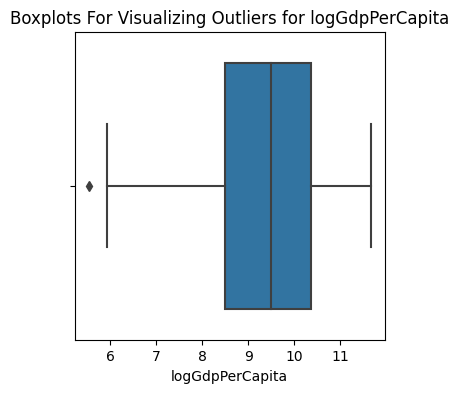

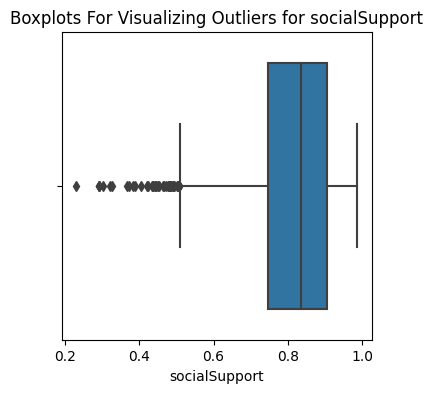

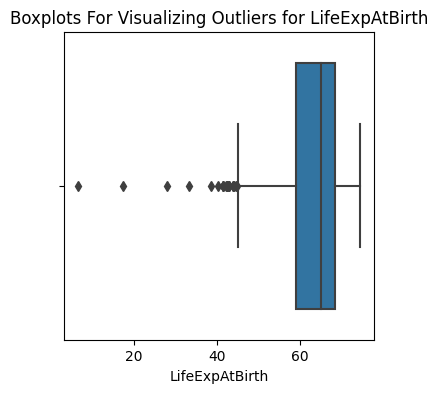

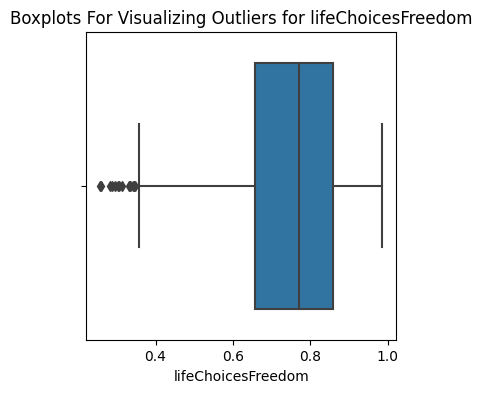

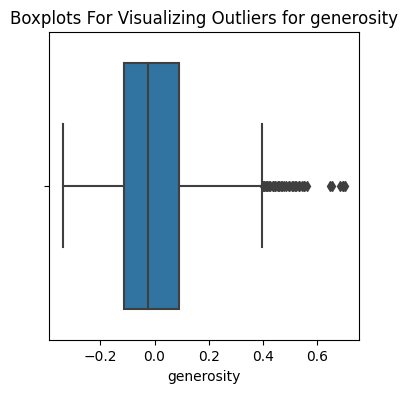

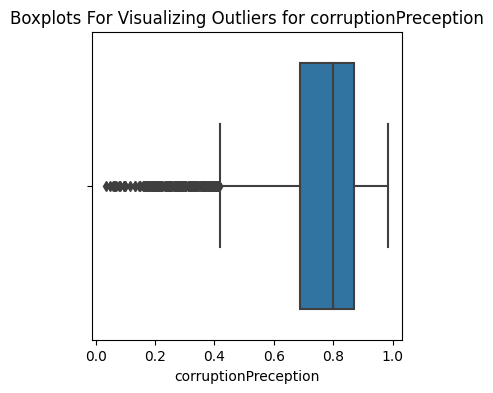

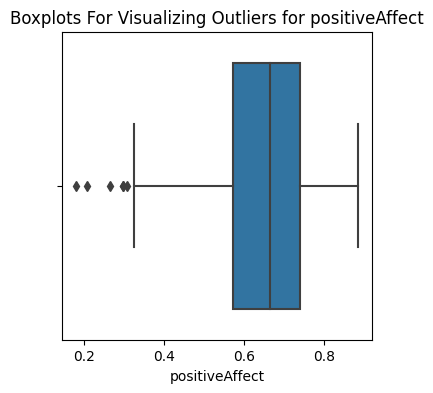

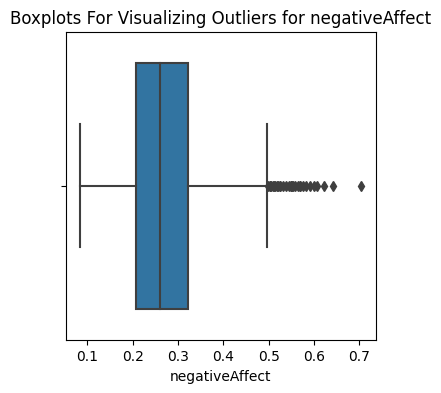

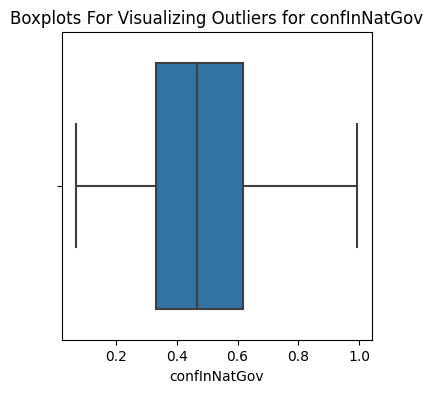

In [ ]:
numColsDF0 = WHRdf1[columns_with_missing_values]

for cols in numColsDF0.columns:
    plt.figure(figsize=(4,4))
    sb.boxplot(x=numColsDF0[cols])
    plt.title("Boxplots For Visualizing Outliers for " + cols)
plt.show()


As all of our columns, with the exception of confidence in national government, have outliers in their observations, we will be using median to impute all of our missing values.

In [ ]:
# imputing all the missing values by the median of specific country
WHRdf1.fillna(WHRdf1.groupby('country')[columns_with_missing_values].transform(lambda x: x.fillna(x.median())), inplace=True, downcast='infer')


In [ ]:
WHRdf1.isna().sum()

country                   0
continent                 0
region                    0
year                      0
happinessScore            0
logGdpPerCapita           9
socialSupport             1
LifeExpAtBirth           32
lifeChoicesFreedom        0
generosity                9
corruptionPreception     29
positiveAffect            2
negativeAffect            1
confInNatGov            130
dtype: int64

In [ ]:
still_missing = WHRdf1.loc[WHRdf1.isna().any(axis =1)]
still_missing_columns = still_missing['country'].unique().tolist()
still_missing_columns

['Algeria',
 'Bahrain',
 'China',
 'Cuba',
 'Hong Kong S.A.R. of China',
 'Kosovo',
 'Libya',
 'Maldives',
 'Oman',
 'Saudi Arabia',
 'Somaliland region',
 'South Sudan',
 'State of Palestine',
 'Sudan',
 'Syria',
 'Turkiye',
 'Turkmenistan',
 'United Arab Emirates']

it looks like some of the countries didn't have any entries for certain variables like 'confidence in government' since 2005. So we will impute with the man of the continet. may be people did not have opportunity to speak for their country's govenment or the interest.

In [ ]:
WHRdf1.fillna(WHRdf1.groupby('continent').transform(lambda x: x.fillna(x.median())), inplace=True, downcast='infer')

<ipython-input-33-16506b5acc42>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.


In [ ]:
WHRdf1.isna().any()

country                 False
continent               False
region                  False
year                    False
happinessScore          False
logGdpPerCapita         False
socialSupport           False
LifeExpAtBirth          False
lifeChoicesFreedom      False
generosity              False
corruptionPreception    False
positiveAffect          False
negativeAffect          False
confInNatGov            False
dtype: bool

so WHRdf1 looks like our final dataframe. we can rename it as well. Then for the following steps, we will solely be using `WHRdf1`. 

## Detecting and Handling Outliers

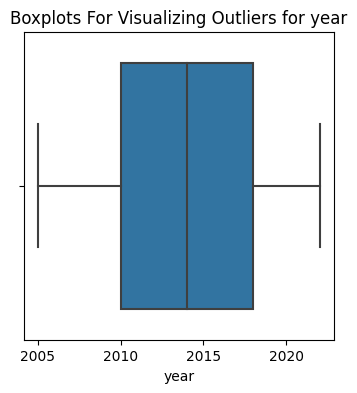

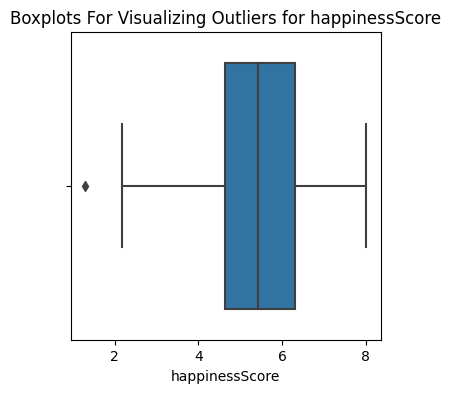

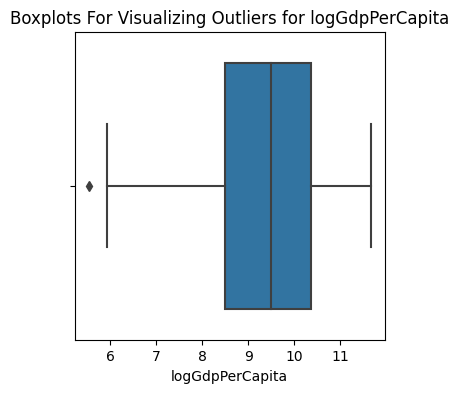

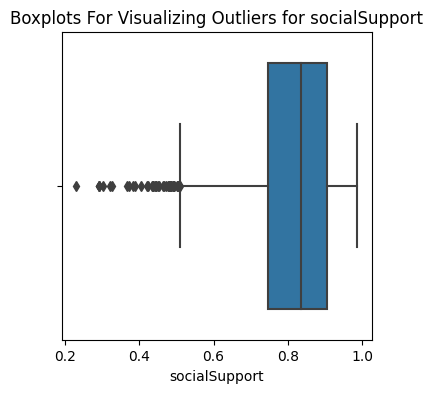

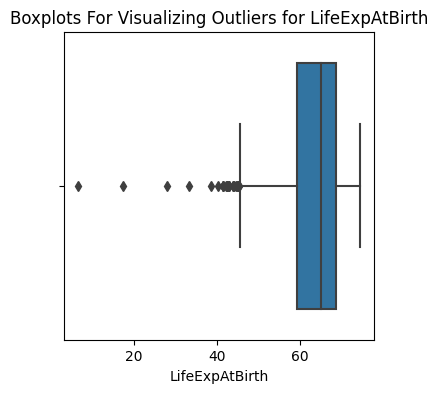

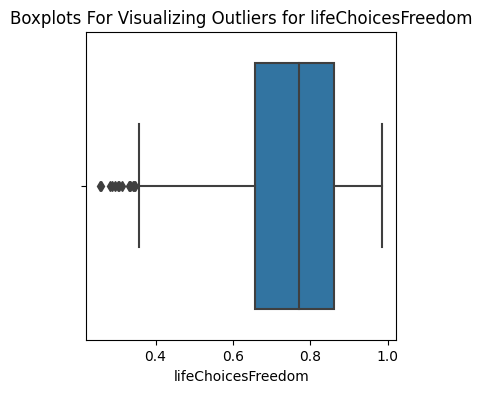

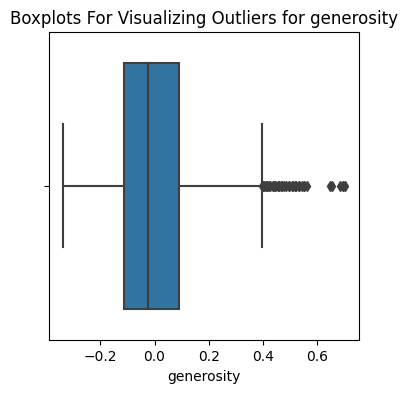

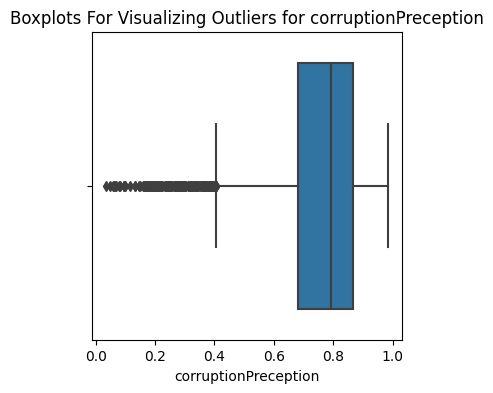

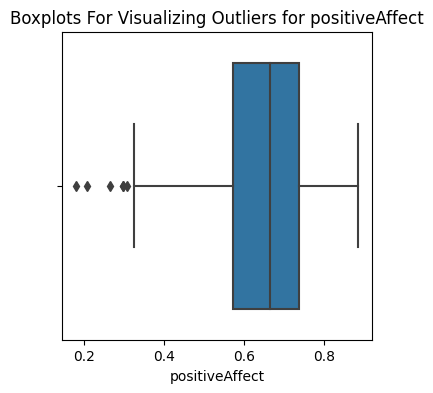

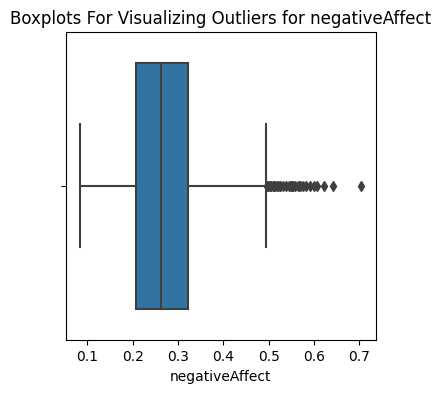

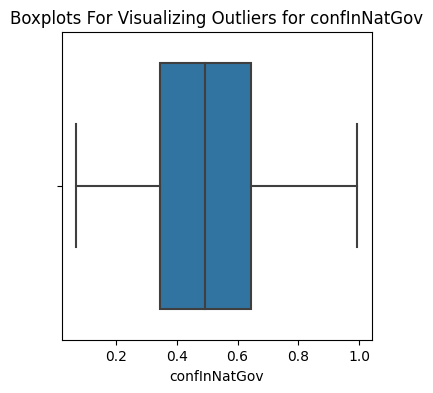

In [ ]:
numCols = ['year', 'happinessScore', 'logGdpPerCapita', 'socialSupport', 'LifeExpAtBirth', 
           'lifeChoicesFreedom', 'generosity', 'corruptionPreception', 'positiveAffect', 
           'negativeAffect', 'confInNatGov']
numColsDF = WHRdf1[numCols]

for cols in numCols:
    plt.figure(figsize=(4,4))
    sb.boxplot(x=numColsDF[cols])
    plt.title("Boxplots For Visualizing Outliers for " + cols)
    plt.show()


Based on the boxplots above, the following columns have outliers: happinessScore, logGdpPerCapita, socialSupport, LifeExpAtBirth, lifeChoicesFreedom, generosity, corruptionPreception, positiveAffect, negativeAffect, and confinNatGov. Therefore, we'll be removing any outliers using the interquartile range method - as shown below:

In [ ]:
for col in numCols:
    Q1 = WHRdf1[col].quantile(0.25)
    Q3 = WHRdf1[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    WHRdf2 = WHRdf1[(WHRdf1[col] >= lower_bound) & (WHRdf1[col] <= upper_bound)]
WHRdf2.head()

country continent      region  year  happinessScore  logGdpPerCapita  \
0  Afghanistan      Asia  South Asia  2008        3.723590         7.350416   
1  Afghanistan      Asia  South Asia  2009        4.401778         7.508646   
2  Afghanistan      Asia  South Asia  2010        4.758381         7.613900   
3  Afghanistan      Asia  South Asia  2011        3.831719         7.581259   
4  Afghanistan      Asia  South Asia  2012        3.782938         7.660506   

   socialSupport  LifeExpAtBirth  lifeChoicesFreedom  generosity  \
0       0.450662       50.500000            0.718114    0.167652   
1       0.552308       50.799999            0.678896    0.190809   
2       0.539075       51.099998            0.600127    0.121316   
3       0.521104       51.400002            0.495901    0.163571   
4       0.520637       51.700001            0.530935    0.237588   

   corruptionPreception  positiveAffect  negativeAffect  confInNatGov  
0              0.881686        0.414297        0.258195      0.612072  
1              0.850035        0.481421        0.237092      0.611545  
2              0.706766        0.516907        0.275324      0.299357  
3              0.731109        0.479835        0.267175      0.307386  
4              0.775620        0.613513        0.267919      0.435440

Recreating boxplots to see if data the outliers have been removed from the dataset

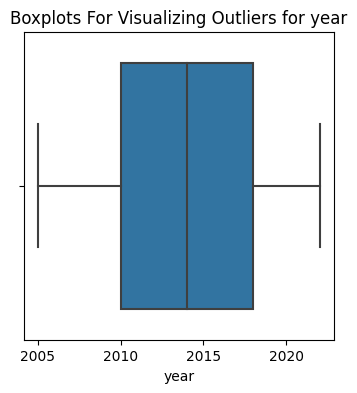

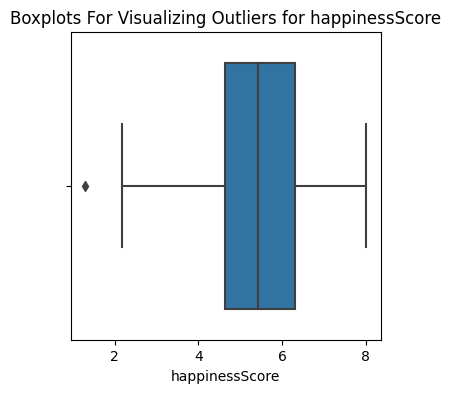

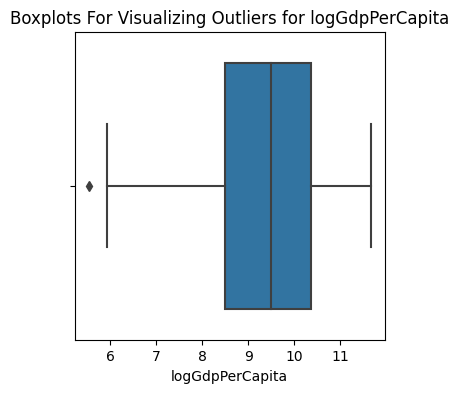

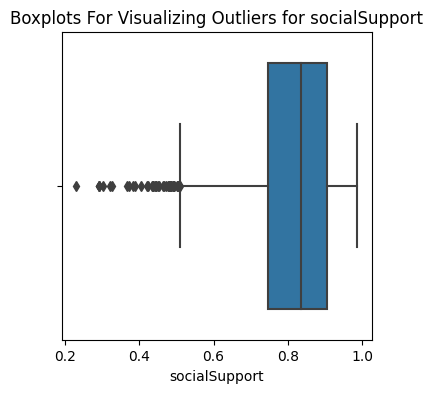

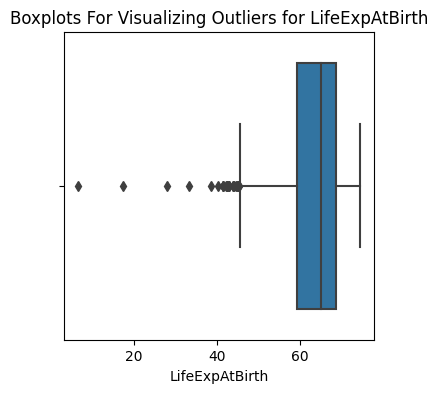

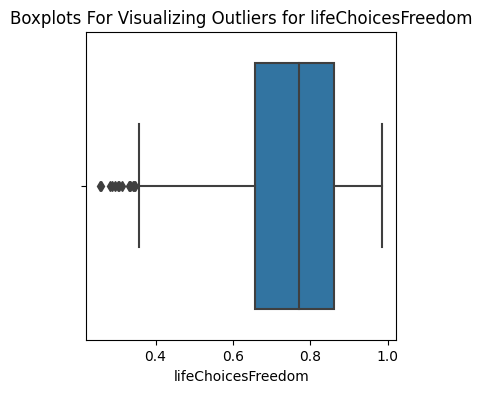

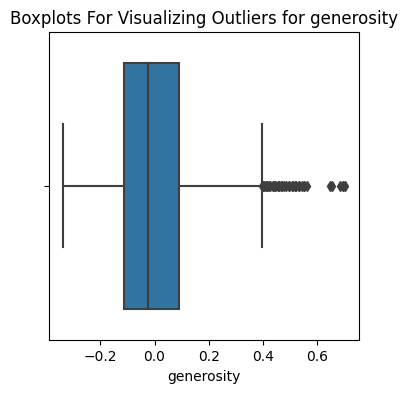

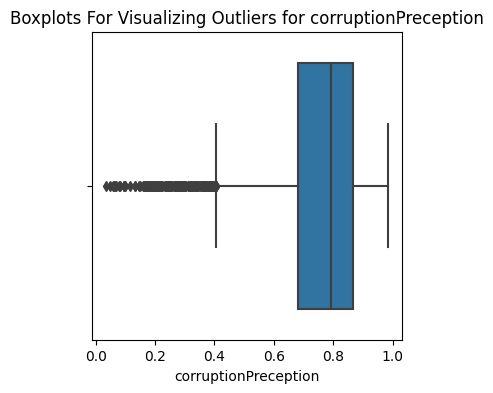

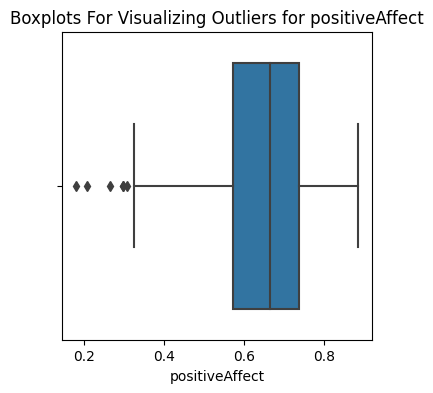

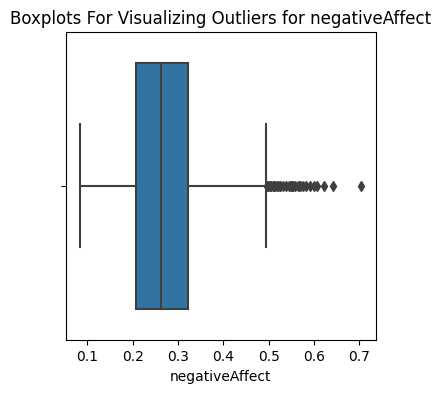

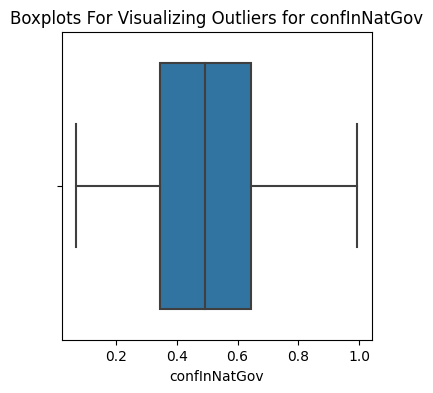

In [ ]:
newNumCols = WHRdf2[numCols]

for Numcols in newNumCols.columns:
    plt.figure(figsize=(4,4))
    sb.boxplot(x=newNumCols[Numcols])
    plt.title("Boxplots For Visualizing Outliers for " + Numcols)
plt.show()

Based on the boxplots above, we can see that even after attempting to remove the outliers, many of them are still present. This suggests that we have a non-normal distribution for all columns except year. Now that the outliers have been dealt with, we can move onto hypothesis testing.

### also write why you only removed outliers for hyp testing and CIs. For the visualizations, you will keep the outliers be ....

## Research Questions


**Secondary Research Question #1: What political and economic factors impact the happiness of countries and continents? (GDP per capita, Freedom to make life choices, Perception of Corruption, Confidence in National Government)**

For this research question, we’ll be creating scatterplots for comparing GDP per capita, Freedom to make life choices, Perception of Corruption, and Confidence in National Government to the happiness score variable to see how each of these factors influence happiness. We will also be creating bar charts for visualizing the top 10 countries with the best and worst GDP per capita, Freedom to make life choices, Perception of Corruption, and Confidence in National Government. Additionally, we’ll also be utilizing heatmaps and correlation matrices to identify correlations between variables e.g., perception of corruption and confidence in national government. Furthermore, we’ll be conducting hypothesis tests to see if there is any significant change in the positive and negative affect among citizens due to economic downturn - during the 2008 financial collapse and the beginning of the covid-19 pandemic. 


The below scatterplots display the relationship between the happiness score and political/ economic variables such as log GDP per capita, freedom to make life choices, preception of corruption, and confidence in national government. 

In [ ]:
fig_gdp = px.scatter(WHRdf1, 'logGdpPerCapita', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
fig_gdp.update_xaxes(title_text='Log GDP per Capita')
fig_gdp.update_yaxes(title_text='Happiness Score')
fig_gdp.update_layout(title_text='Log GDP per Capita vs Happiness Score')
fig_gdp.show()

fig_free = px.scatter(WHRdf1, 'lifeChoicesFreedom', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
fig_free.update_xaxes(title_text='Freedom to Make Life Choices')
fig_free.update_yaxes(title_text='Happiness Score')
fig_free.update_layout(title_text='Freedom to Make Life Choices vs Happiness Score')
fig_free.show()

fig_corrupt = px.scatter(WHRdf1, 'corruptionPreception', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
fig_corrupt.update_xaxes(title_text='Perceptions Of Corruption')
fig_corrupt.update_yaxes(title_text='Happiness Score')
fig_corrupt.update_layout(title_text='Perceptions Of Corruption vs Happiness Score')
fig_corrupt.show()

fig_gov = px.scatter(WHRdf1, 'confInNatGov', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
fig_gov.update_xaxes(title_text='Confidence In National Government')
fig_gov.update_yaxes(title_text='Happiness Score')
fig_gov.update_layout(title_text='Confidence In National Government vs Happiness Score')
fig_gov.show()

**Looking at the correlation between happiness and political/economic variables**

In [ ]:
GDPvHap = WHRdf1['logGdpPerCapita'].corr(WHRdf1['happinessScore'])
LCFvHap = WHRdf1['lifeChoicesFreedom'].corr(WHRdf1['happinessScore'])
CPvHap = WHRdf1['corruptionPreception'].corr(WHRdf1['happinessScore'])
CNGvHap = WHRdf1['confInNatGov'].corr(WHRdf1['happinessScore'])

print("The correlation coefficient for the relationship between log GDP per capital and happiness score is:", GDPvHap)
print("The correlation coefficient for the relationship between freedom to make life choices and happiness score is:", LCFvHap)
print("The correlation coefficient for the relationship between preception of corruption and happiness score is:", CPvHap)
print("The correlation coefficient for the relationship between confidence in national government and happiness score is:", CNGvHap)

The correlation coefficient for the relationship between log GDP per capital and happiness score is: 0.7849686965390011
The correlation coefficient for the relationship between freedom to make life choices and happiness score is: 0.529583072393526
The correlation coefficient for the relationship between preception of corruption and happiness score is: -0.44573089460862214
The correlation coefficient for the relationship between confidence in national government and happiness score is: -0.08521301752424741


In [ ]:
## Write about the scatterplots and the relationships

From the correlation coefficients obtained above, we can see that the strongest correlation is between log GDP per capita and happiness score. Therefore, we now want to determine the following: is there significant difference in the happiness score between countries with higher log GDP per capita as compared to countries with lower log GDP per capita.

Firstly, we will be constructing a 95% confidence interval for the difference in happiness score between countries with higher log GDP per capita and countries with lower log GDP per capita.

In [ ]:
# using the median as a cutoff point to select countries with high and low GDP per capita

# selecting countries with high log GDP per capita
highGDPcountries = WHRdf2[WHRdf2["logGdpPerCapita"] >= WHRdf2["logGdpPerCapita"].median()]
highGDPcountries2 = highGDPcountries[['happinessScore', 'logGdpPerCapita']]
# selecting countries with low log GDP per capita

lowGDPcountries = WHRdf2[WHRdf2["logGdpPerCapita"] < WHRdf2["logGdpPerCapita"].median()]
lowGDPcountries2 = lowGDPcountries[['happinessScore', 'logGdpPerCapita']]


Now that we have distributed the data into two groups i.e., happiness score for high GDP per Capita countries and happiness score for low GDP per Capita countries, we are creating boxplots to see if there are outliers present in either group as they can impact the results of the hypothesis test. 

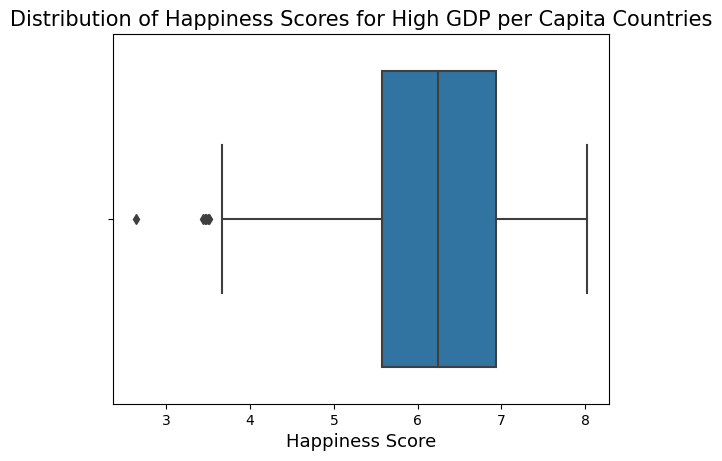

In [ ]:
sb.boxplot(x="happinessScore", data=highGDPcountries2)
plt.title("Distribution of Happiness Scores for High GDP per Capita Countries", fontsize=15)
plt.xlabel("Happiness Score", fontsize=13)
plt.show()

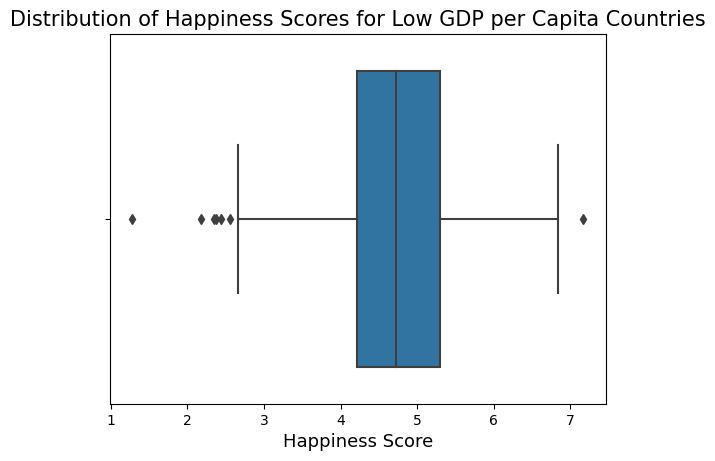

In [ ]:
sb.boxplot(x="happinessScore", data=lowGDPcountries2)
plt.title("Distribution of Happiness Scores for Low GDP per Capita Countries", fontsize=15)
plt.xlabel("Happiness Score", fontsize=13)
plt.show()

Based on the boxplots above, we can see that both groups i.e., happiness score for high GDP per Capita countries and happiness score for low GDP per Capita countries, have outliers present. Therefore, we will be removing them based on the interquartile range method. 

In [ ]:
# Calculating IQR and low/upper bounds for high GDP countries
Q1High = np.percentile(highGDPcountries2["happinessScore"], 25)
Q3High = np.percentile(highGDPcountries2["happinessScore"], 75)
HighIQR = Q3High - Q1High
UBhigh = Q3High + (1.5 * HighIQR)
LBhigh = Q1High - (1.5 * HighIQR)

# Removing Outliers
highGDPcountries2 = highGDPcountries2[(highGDPcountries2["happinessScore"] >= LBhigh) & (highGDPcountries2["happinessScore"] <= UBhigh)]

# Calculating IQR and low/upper bounds for low GDP countries
Q1Low = np.percentile(lowGDPcountries2["happinessScore"], 25)
Q3Low = np.percentile(lowGDPcountries2["happinessScore"], 75)
LowIQR = Q3Low - Q1Low
UBlow = Q3Low + 1.5*LowIQR
LBlow = Q1Low - 1.5*LowIQR

# Removing Outliers
lowGDPcountries2 = lowGDPcountries2[(lowGDPcountries2["happinessScore"] >= LBlow) & (lowGDPcountries2["happinessScore"] <= UBlow)]


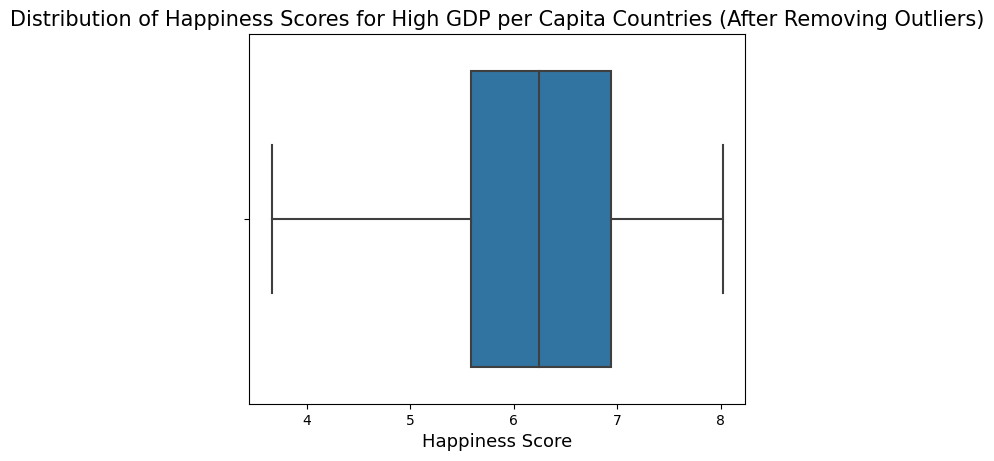

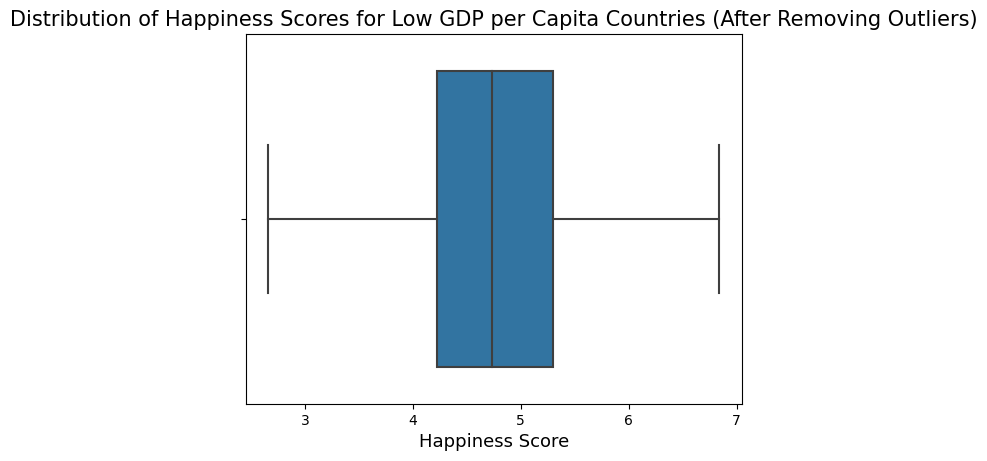

In [ ]:
sb.boxplot(x="happinessScore", data=highGDPcountries2)
plt.title("Distribution of Happiness Scores for High GDP per Capita Countries (After Removing Outliers)", fontsize=15)
plt.xlabel("Happiness Score", fontsize=13)
plt.show()

sb.boxplot(x="happinessScore", data=lowGDPcountries2)
plt.title("Distribution of Happiness Scores for Low GDP per Capita Countries (After Removing Outliers)", fontsize=15)
plt.xlabel("Happiness Score", fontsize=13)
plt.show()

Now that the outliers have been removed for both groups, we can move onto calculating the confidence intervals and hypothesis testing.

In [ ]:
n_high = len(highGDPcountries2)
n_low = len(lowGDPcountries2)
n = n_high + n_low

# calculating sample means
sampleMeanHigh = highGDPcountries2['happinessScore'].mean()
sampleMeanLow = lowGDPcountries2['happinessScore'].mean()
sample_mean = sampleMeanHigh - sampleMeanLow

# calculating sample stdevs 
sampleStdHigh = highGDPcountries2['happinessScore'].std()
sampleStdLow = lowGDPcountries2['happinessScore'].std()
Totalstd = sampleStdHigh + sampleStdLow

dfVal = n - 2
alpha = 0.05
t_critical = stats.t.ppf(q = 0.975, df = dfVal)
print("t-critical value:")
print(t_critical)  
print(" ")

margin_of_error = t_critical * (Totalstd/math.sqrt(n))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9610507812978977
 
Confidence interval:
(1.3978572417323074, 1.5372375792365405)


Based on the confidence interval calculated above, we are 95% confident that the true population mean difference in happiness score between high GDP per capita and low GDP per capita countries lies between 1.3979 and 1.5372. 

#### Hypothesis Testing

**Step 1** We wish to determine if there is significant difference in the happiness score between countries with higher log GDP per capita as compared to countries with lower log GDP per capita.The hypotheses can be written as:

Let $\mu_1$ represent countries with high GDP per capita and $\mu_2$ represent countries with low GDP per capita respectively. 

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 \neq \mu_2$

This is a two-tailed test as we are comparing the differences between the following two groups: countries with higher log GDP per capita and countries with lower log GDP per capita


**Step 2**

The level of significance is $\alpha$ = 0.05.

**Step 3** Obtain the P-value.

This is a two-tailed test. 

We use [scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)  to help us compute the P-value.

In [ ]:
import scipy.stats as stats
stats.ttest_ind(a=highGDPcountries2['happinessScore'], b=lowGDPcountries2['happinessScore'], equal_var = False)

Ttest_indResult(statistic=41.25917958814053, pvalue=3.691013572049011e-275)

Now that we know that there is significant difference in happiness score between countries with higher and lower GDP per capita, we'll be creating bar charts to see what are the top 10 and bottom 10 countries for log GDP per capita. We'll also be creating box plots for each of the other three political/ economic variables. 

**Creating bar charts for the top and bottom 10 countries based on the 4 political and economic variables**

In [ ]:
# Grouping the data by the country variable
# Calculating the mean for each of the 4 economic/political variables
# Sorting the data for each of the 4 variables (in ascending order) and then getting the top 10 and bottom 10 countries
groupByGDP = WHRdf1.groupby(["country", "continent"])["logGdpPerCapita"].mean().reset_index()
top10GDP = groupByGDP.sort_values("logGdpPerCapita", ascending=False).head(10)
bottom10GDP = groupByGDP.sort_values("logGdpPerCapita", ascending=True).head(10)


groupByFree = WHRdf1.groupby(["country", "continent"])["lifeChoicesFreedom"].mean().reset_index()
top10Free = groupByFree.sort_values("lifeChoicesFreedom", ascending=False).head(10)
bottom10Free = groupByFree.sort_values("lifeChoicesFreedom", ascending=True).head(10)


groupByCorrupt = WHRdf1.groupby(["country", "continent"])["corruptionPreception"].mean().reset_index()
top10Corrupt = groupByCorrupt.sort_values("corruptionPreception", ascending=False).head(10)
bottom10Corrupt = groupByCorrupt.sort_values("corruptionPreception", ascending=True).head(10)


groupByGov = WHRdf1.groupby(["country", "continent"])["confInNatGov"].mean().reset_index()
top10Gov = groupByGov.sort_values("confInNatGov", ascending=False).head(10)
bottom10Gov = groupByGov.sort_values("confInNatGov", ascending=True).head(10)


In [ ]:
# Sorting the data for each of the 4 variables and then getting all countries

GDPCountries = groupByGDP.sort_values("logGdpPerCapita")
FreeCountries = groupByFree.sort_values("lifeChoicesFreedom")
CorruptCountries = groupByCorrupt.sort_values("corruptionPreception")
GovCountries = groupByGov.sort_values("confInNatGov")

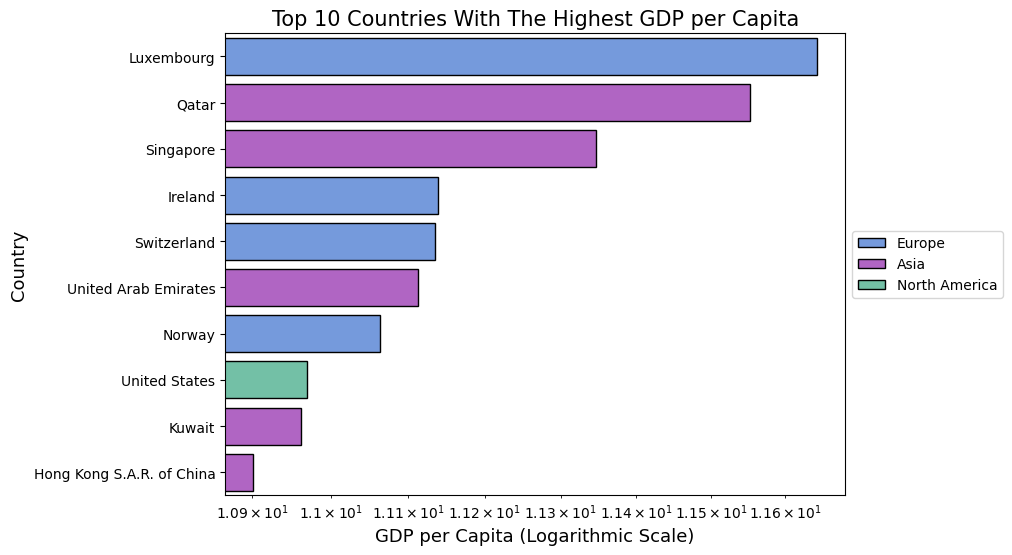

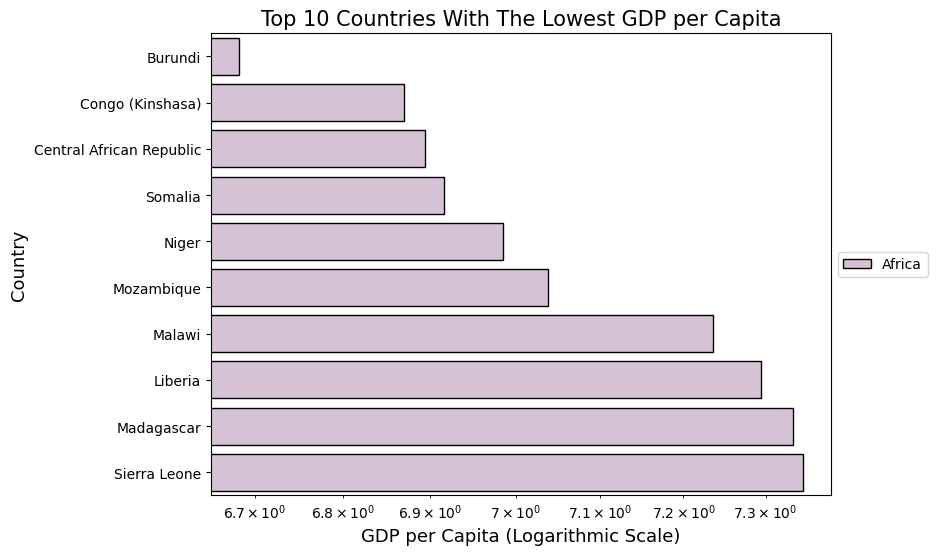

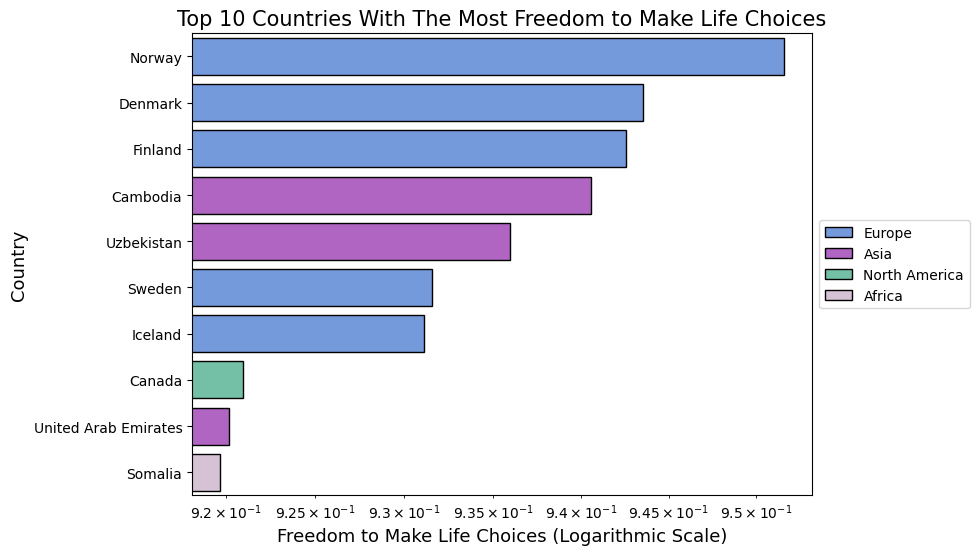

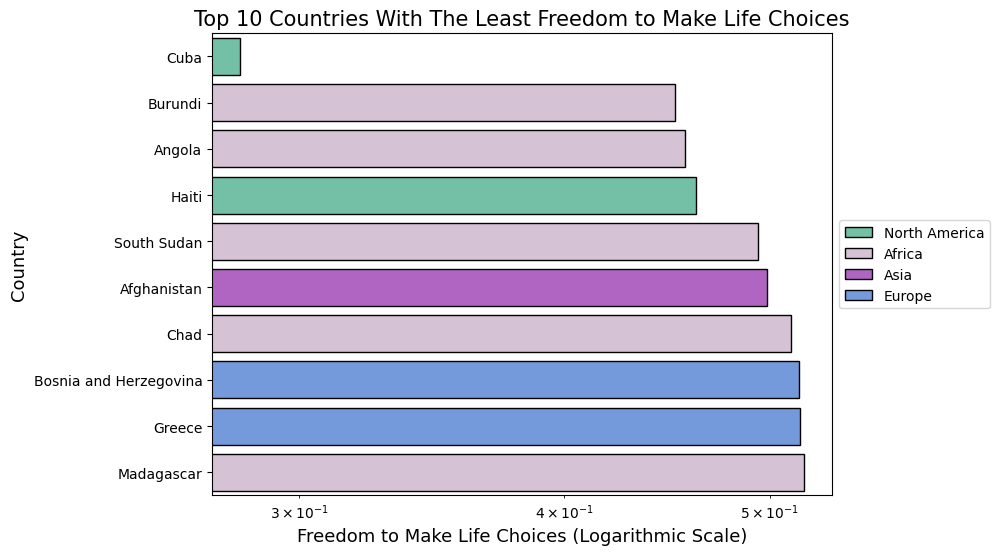

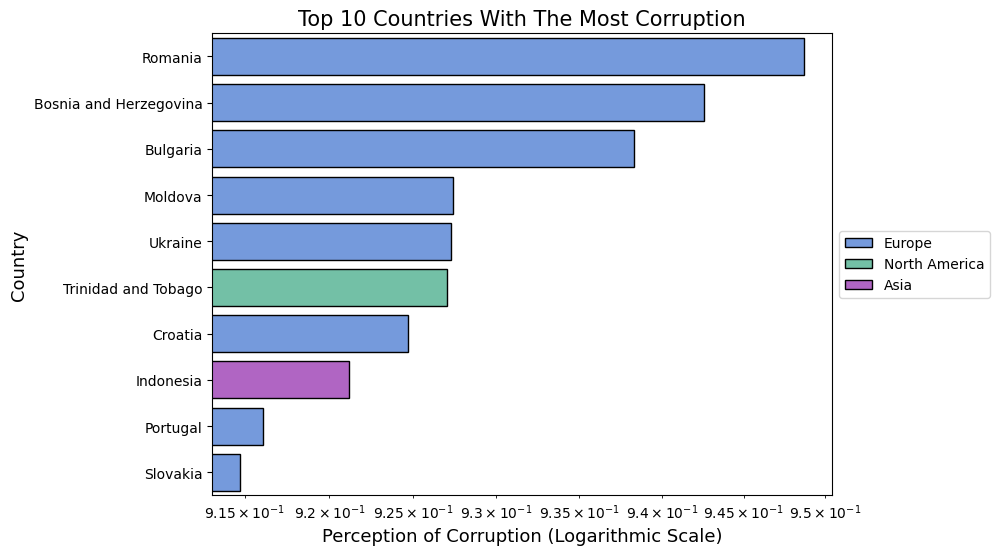

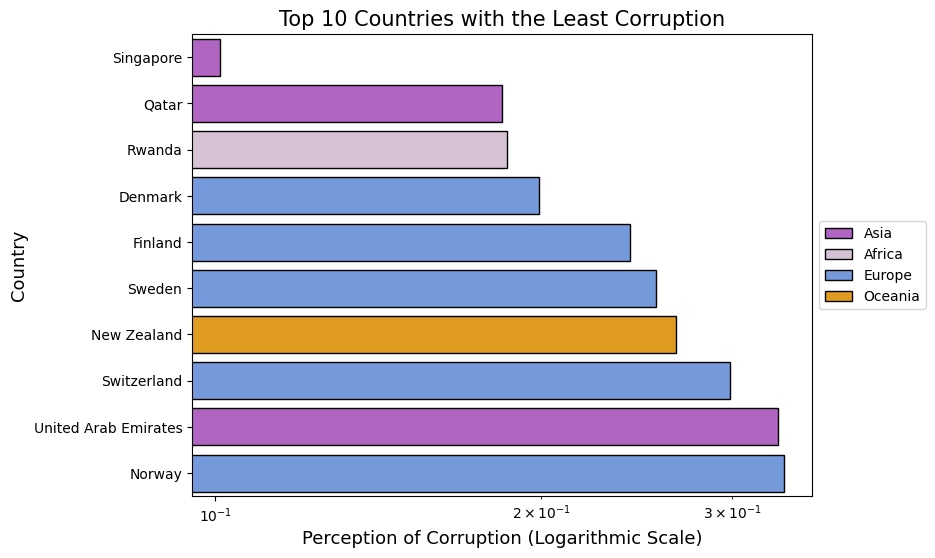

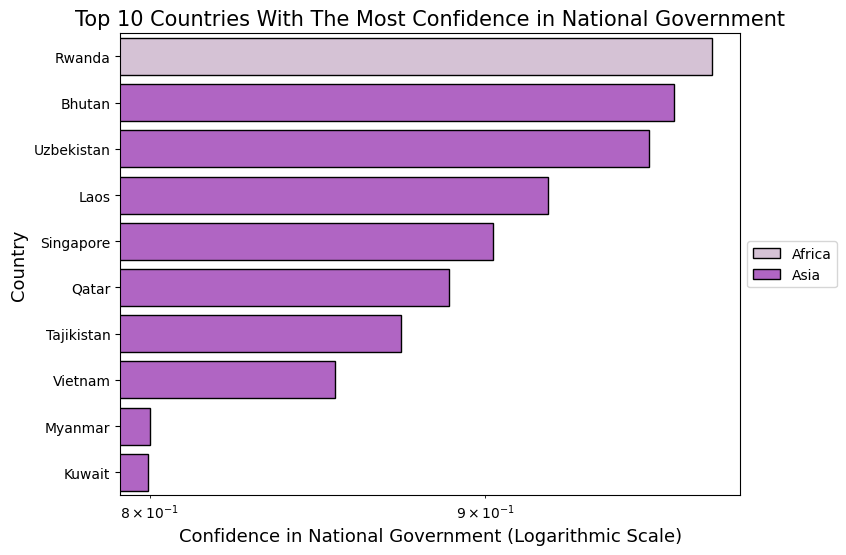

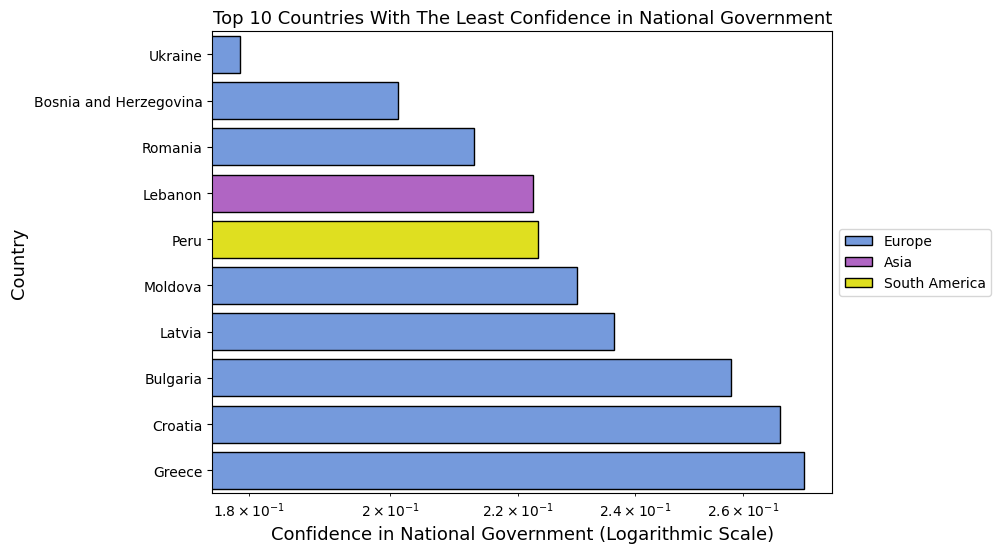

In [ ]:
color_dict = {'Asia': 'mediumorchid', 'Europe': 'cornflowerblue', 'Africa': 'thistle', 'North America': 'mediumaquamarine', 'South America': 'yellow', 'Oceania': 'orange'}

fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="logGdpPerCapita", y="country", hue="continent", dodge=False, data=top10GDP, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Highest GDP per Capita", fontsize=15)
ax.set_xlabel("GDP per Capita (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="logGdpPerCapita", y="country", hue="continent", dodge = False, data=bottom10GDP, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Lowest GDP per Capita", fontsize=15)
ax.set_xlabel("GDP per Capita (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="lifeChoicesFreedom", y="country", hue="continent", dodge = False, data=top10Free, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Most Freedom to Make Life Choices", fontsize=15)
ax.set_xlabel("Freedom to Make Life Choices (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="lifeChoicesFreedom", y="country", hue="continent", dodge = False, data=bottom10Free, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Least Freedom to Make Life Choices", fontsize=15)
ax.set_xlabel("Freedom to Make Life Choices (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="corruptionPreception", y="country", hue="continent", dodge = False, data=top10Corrupt, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Most Corruption", fontsize=15)
ax.set_xlabel("Perception of Corruption (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.savefig("corruptTop_bar.png", bbox_inches="tight") 
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="corruptionPreception", y="country", hue="continent", dodge = False, data=bottom10Corrupt, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries with the Least Corruption", fontsize=15)
ax.set_xlabel("Perception of Corruption (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.savefig("corruptBottom_bar.png", bbox_inches="tight") 
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="confInNatGov", y="country", hue="continent", dodge = False, data=top10Gov, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Most Confidence in National Government", fontsize=15)
ax.set_xlabel("Confidence in National Government (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.savefig("govTop_bar.png", bbox_inches="tight") 
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(x="confInNatGov", y="country", hue="continent", dodge = False, data=bottom10Gov, edgecolor="black", palette=color_dict)
ax.set_title("Top 10 Countries With The Least Confidence in National Government", fontsize=13)
ax.set_xlabel("Confidence in National Government (Logarithmic Scale)", fontsize=13)
ax.set_ylabel("Country", fontsize=13)
ax.set_xscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.savefig("govBottom_bar.png", bbox_inches="tight") 
plt.show()

<ipython-input-128-afcd302c412d>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




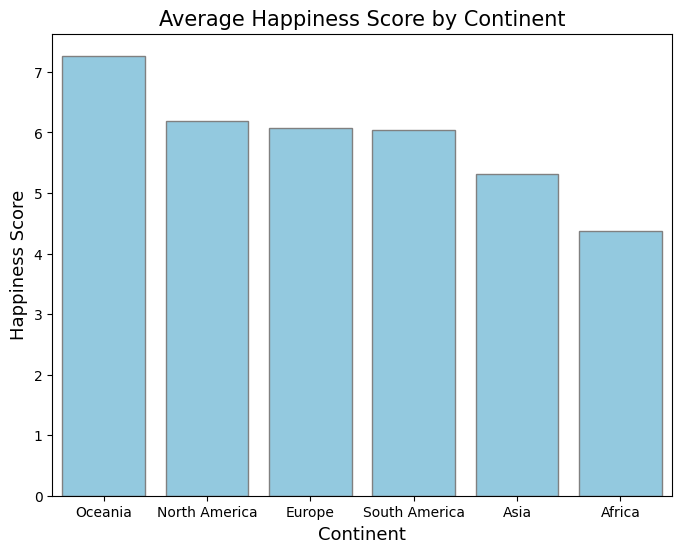

In [ ]:
# Grouping by continent and calculating the mean happiness score + sorting in descending order
groupByContinent3 = WHRdf1.groupby("continent")["happinessScore"].mean().reset_index()
groupByContinent3 = groupByContinent3.sort_values("happinessScore", ascending=False)

plt.figure(figsize=(8, 6))
sb.barplot(x="continent", y="happinessScore", data=WHRdf1, ci = None, order=groupByContinent3["continent"], color="skyblue", edgecolor="gray")
plt.xlabel("Continent", fontsize=13)
plt.ylabel("Happiness Score", fontsize=13)
plt.title("Average Happiness Score by Continent", fontsize=15)
plt.show()

In [ ]:
fig = px.choropleth(GDPCountries, 
                    locations="country", 
                    locationmode="country names",
                    color="logGdpPerCapita",
                    hover_name="country",
                    hover_data=["logGdpPerCapita", "country"],
                    title="GDP per Capita",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

fig = px.choropleth(FreeCountries, 
                    locations="country", 
                    locationmode="country names",
                    color="lifeChoicesFreedom",
                    hover_name="country",
                    hover_data=["lifeChoicesFreedom", "country"],
                    title="Freedom to Make Life Choices",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

fig = px.choropleth(CorruptCountries, 
                    locations="country", 
                    locationmode="country names",
                    color="corruptionPreception",
                    hover_name="country",
                    hover_data=["corruptionPreception", "country"],
                    title="Perception of Corruption",
                    color_continuous_scale=px.colors.sequential.Plasma)


fig.show()

fig = px.choropleth(GovCountries, 
                    locations="country", 
                    locationmode="country names",
                    color="confInNatGov",
                    hover_name="country",
                    hover_data=["confInNatGov", "country"],
                    title="Confidence In National Government",
                    color_continuous_scale=px.colors.sequential.Plasma)


fig.show()


**Secondary Research Question #2: What social factors impact the happiness of countries and continents? (Generosity, life expectancy, social support)**




`For this research question, we’ll be creating scatterplots for comparing generosity, life expectancy, and social support to the life ladder variable to see how each of these factors influence happiness. We will also be creating bar charts for visualizing the top 10 countries with the best and worst generosity, life expectancy, and social support. Additionally, we’ll also be utilizing heatmaps and correlation matrices to identify correlations between variables e.g., life expectancy and social support. Furthermore, we’ll be conducting principal component analysis (PCA) to examine the principal factors that account for the majority of variance in positive and negative affect among citizens.`

In [ ]:
# Sub-Research Question 2
WHRdf1.head()


country continent      region  year  happinessScore  logGdpPerCapita  \
0  Afghanistan      Asia  South Asia  2008        3.723590         7.350416   
1  Afghanistan      Asia  South Asia  2009        4.401778         7.508646   
2  Afghanistan      Asia  South Asia  2010        4.758381         7.613900   
3  Afghanistan      Asia  South Asia  2011        3.831719         7.581259   
4  Afghanistan      Asia  South Asia  2012        3.782938         7.660506   

   socialSupport  LifeExpAtBirth  lifeChoicesFreedom  generosity  \
0       0.450662       50.500000            0.718114    0.167652   
1       0.552308       50.799999            0.678896    0.190809   
2       0.539075       51.099998            0.600127    0.121316   
3       0.521104       51.400002            0.495901    0.163571   
4       0.520637       51.700001            0.530935    0.237588   

   corruptionPreception  positiveAffect  negativeAffect  confInNatGov  
0              0.881686        0.414297        0.258195      0.612072  
1              0.850035        0.481421        0.237092      0.611545  
2              0.706766        0.516907        0.275324      0.299357  
3              0.731109        0.479835        0.267175      0.307386  
4              0.775620        0.613513        0.267919      0.435440

In [ ]:
fig = px.scatter(WHRdf1, 'generosity', 'happinessScore', trendline = 'ols', hover_data = ['country']) # ordinary least square regression
# Set axis labels and plot title
fig.update_xaxes(title_text='Generosity')
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(title_text='Happiness Score Vs Generosity')

fig.show()

In [ ]:
print("The correlation coefficient between Generosity and happiness score is:", WHRdf1['generosity'].corr(WHRdf1['happinessScore']))

The correlation coefficient between Generosity and happiness score is: 0.1823922512533233


The graph shows negligible positive correlation between `Generosity` and `Happiness Score`, but the correlation coefficient is very low i.e 0.18, so we can not attribute the changes in happiness score to the varying level of generosity in a nation. To collect data for generosity, surveyors asked this question: “Have you donated money to a charity in the past month?”

Some countries might have lower proportion of rich people who donate havily which necessarily might not predict the overall happiness of a nation.

In [ ]:
fig = px.scatter(WHRdf1, 'LifeExpAtBirth', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
# Set axis labels and plot title
fig.update_xaxes(title_text='Life Expectancy at Birth')
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(title_text='Happiness Score Vs Life Expectancy at Birth')

In [ ]:
print("The correlation coefficient between Life Expectancy at Birth and happiness score is:", WHRdf1['LifeExpAtBirth'].corr(WHRdf1['happinessScore']))

The correlation coefficient between Life Expectancy at Birth and happiness score is: 0.7131248631518963


positive correlation. And significant correlation coeff. 

In [41]:
WHRdf1[WHRdf1['LifeExpAtBirth'] < 40]

NameError: name 'WHRdf1' is not defined

wow, In Haiti, for four consecutive surveys (2 year interval, from 2006- 2012) life exp was below 40. Let's look at haiti alone.

In [42]:
Haiti = WHRdf1[WHRdf1['country'].str.lower() == 'haiti']

NameError: name 'WHRdf1' is not defined

In [ ]:
fig = px.scatter(Haiti, 'year', 'LifeExpAtBirth')
fig.update_layout(title_text = 'Life Expectancy at Birth Over Years in Haiti')

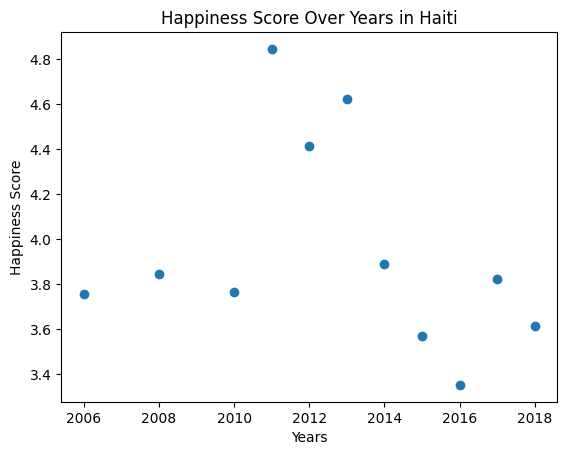

In [ ]:
plt.scatter(Haiti['year'], Haiti['happinessScore'])
plt.xlabel('Years')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Over Years in Haiti')
plt.show()

So the general trend was higher life expectancy of a country coorelating with higher happiness, better quality of people of that nation. The correlation coefficient is also higher, but still it can not be generalized to all countries. Haiti's life expectancy is increasing, in average, from 7 to 55 years from 2006-2018, but the overall happiness score is not moving in a single, positive direction dure these increments in life expectancy.

In [ ]:
fig = px.scatter(WHRdf1, 'socialSupport', 'happinessScore', trendline = 'ols', hover_data = ['country']) # ordinary least square regression
# Set axis labels and plot title
fig.update_xaxes(title_text='Social Support')
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(title_text='Happiness Score Vs Social Support')

fig.show()

In [ ]:
print("The correleation coefficient between social support and Happiness Score of a nation is:", WHRdf1['socialSupport'].corr(WHRdf1['happinessScore']))

The correleation coefficient between social support and Happiness Score of a nation is: 0.721774577041699


Social support is the verage of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

There is a higher, positive, significant correlation.
Other research in social science also indicates that people in nation where they are well connected and less isolated tend to be happier.

In [ ]:
fig = px.scatter(WHRdf1, 'negativeAffect', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
# Set axis labels and plot title
fig.update_xaxes(title_text='negativeAffect')
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(title_text='Happiness Score Vs negativeAffect')

In [ ]:
print("The correlation coefficient between social support and Happiness Score of a nation is:", WHRdf1['negativeAffect'].corr(WHRdf1['happinessScore']))

The correlation coefficient between social support and Happiness Score of a nation is: -0.3393712550847594


Negative affect is defined as the average of previous-day effects measures for worry, sadness, and anger.
In general, there tends to be negative correlation between negative affect of previous days and happiness score of people.

In [ ]:
fig = px.scatter(WHRdf1, 'positiveAffect', 'happinessScore', trendline = 'ols', hover_data = ['country', 'year']) # ordinary least square regression
# Set axis labels and plot title
fig.update_xaxes(title_text='positive Affect')
fig.update_yaxes(title_text='Happiness Score')
fig.update_layout(title_text='Happiness Score Vs Positive Affect')

In [ ]:
print("The correleation coefficient between positive affect and Happiness Score of a nation is:", WHRdf1['positiveAffect'].corr(WHRdf1['happinessScore']))

The correleation coefficient between positive affect and Happiness Score of a nation is: 0.5173038219551037


Positive affect is defined as the average of previous-day effects measures for laughter, enjoyment, and interest.There is a strong positive correlation between positive affect people feel and their happiness score.

In [ ]:
# let's see how the positive and negative affect correlate with each other
# the obvious assumption will be negative correlation
# higher negative (stress, worried), less positivity
fig = px.scatter(WHRdf1, 'negativeAffect', 'positiveAffect', trendline= 'ols', hover_data=['country', 'year'])
fig.update_layout(title_text = 'Correlation between Positive and Negative Affect')

In [ ]:
print("The correleation coefficient between the positive and negative affect among people is:", WHRdf1['negativeAffect'].corr(WHRdf1['positiveAffect']))

The correleation coefficient between the positive and negative affect among people is: -0.3292627544889698


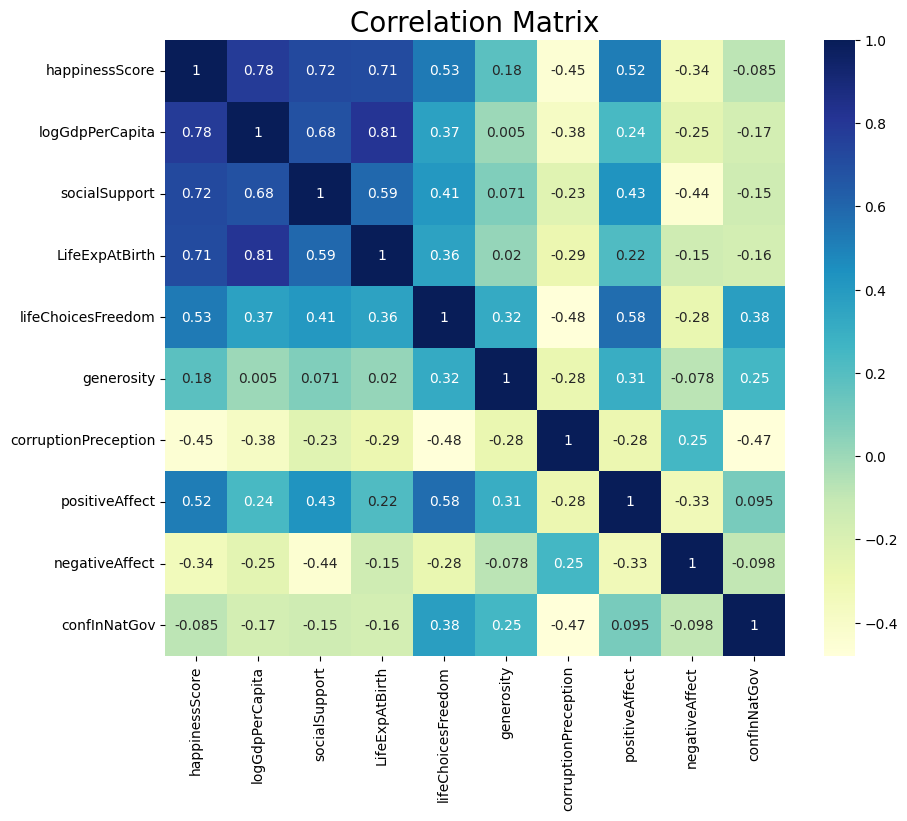

In [ ]:
# let's see overall correlation interaction between our numerical variables.
# correlation matrix

columns_of_interest = ['happinessScore', 'logGdpPerCapita', 'socialSupport', 'LifeExpAtBirth',
                       'lifeChoicesFreedom', 'generosity', 'corruptionPreception', 'positiveAffect',
                       'negativeAffect', 'confInNatGov']

# Select the columns of interest and compute the correlation matrix
corr_matrix = WHRdf1[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap="YlGnBu") 

plt.title("Correlation Matrix", fontsize=20)
plt.show()


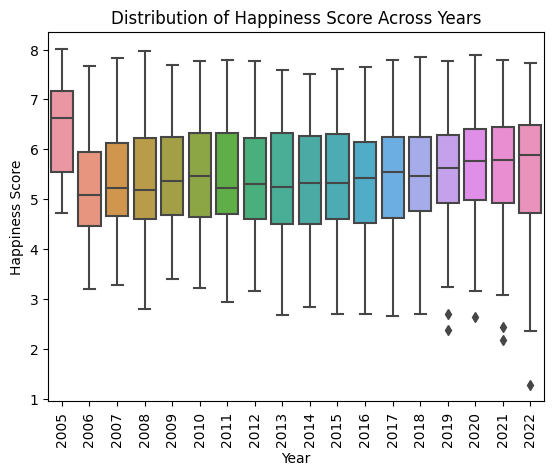

In [ ]:
# happiness score change over time. 
sb.boxplot(WHRdf1, x = 'year', y = 'happinessScore')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Score Across Years')
plt.show()

In general, the world will be progressing forward in socio-econimic attributes over time. So since 2005, we would assume the world is getting better in every terms (life expectancy, social support, GDP, generosity, Governance, etc.) So the mean happiness score would also be assumed to increase over time by linear correlation, assumption. But the data doesn't simply show this. For example, mean happiness score of the world in 2005 was higher than all the following years. 

#### Hypothesis Testing 2

**Step 1** We wish to determine if there is significant difference in the happiness score before and after COVID times. The hypotheses can be written as:

Let $\mu_1$ represent happiness score before COVID and $\mu_2$ represent happiness score after COVID respectively. 

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

This is a one-tailed test as we are hypothesizing that the happiness score after covid will be less than the happiness score before COVID.


**Step 2**

The level of significance is $\alpha$ = 0.05.

**Step 3** Obtain the P-value.

This is a one-tailed test. 

We use [scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)  to help us compute the P-value.

In [ ]:
# quick hypothesis testing independent two sample t-test # one sided
import scipy.stats as stats
from scipy.stats import ttest_ind

# Select the years before and after COVID
before_covid = WHRdf2[WHRdf2['year'] == 2019]
after_covid = WHRdf2[WHRdf2['year'] == 2021]

stats.ttest_ind(a=before_covid['happinessScore'], b=after_covid['happinessScore'], equal_var = False, alternative = 'greater')


Ttest_indResult(statistic=-0.4686776813813489, pvalue=0.3198503889363823)



The p value 0.31985 > 0.05 = $\alpha$, so we fail to reject the null hypothesis.
 
So there is no significant difference in the happiness score before and after COVID.

#### Hypothesis Testing 2.1

**Step 1** We wish to determine if there is significant difference in the happiness score among people of different contients. These will be series of hypotheses. The first hypotheses is Asian people are happier than African people. The first hypothesis can be written as:

Let $\mu_1$ represent happiness score of Asian people and $\mu_2$ represent happiness score of African people respectively. 

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

This is a one-tailed test as we are hypothesizing that the happiness score of Asian people to be higher than that of African people.


**Step 2**

The level of significance is $\alpha$ = 0.05.

**Step 3** Obtain the P-value.

This is a one-tailed test. 

We use [scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)  to help us compute the P-value.

In [ ]:

# Select the columns you want to compare
col1 = 'continent'
col2 = 'happinessScore'

# Create a list of dataframes, one for each region
from scipy.stats import ttest_ind

# Select the regions you want to compare
region1 = 'Asia'
region2 = 'Africa'

# Get the data for each region
region1_df = WHRdf2[WHRdf2[col1] == region1]
region2_df = WHRdf2[WHRdf2[col1] == region2]
stats.ttest_ind(a=region2_df['happinessScore'], b=region1_df['happinessScore'], equal_var = False, alternative = 'greater')




Ttest_indResult(statistic=-19.523385477499804, pvalue=1.0)

The p value 1.0 > 0.05 =  𝛼 , so we fail to reject the null hypothesis.
So there is no significant evidence to confirm the happiness score Asian people is higher than that of Africans.

Hypothesis 2.2

The second hypothesis is: People in African country have lower happiness score compared to people in North America. 
This hypothesis can be written as:

Let  𝜇1  represent happiness score of African people and  𝜇2  represent happiness score of people in North America respectively.

𝐻0:𝜇1=𝜇2 

𝐻𝑎:𝜇1<𝜇2 

This is a one-tailed test as we are hypothesizing that the happiness score of North-American people to be higher than that of African people.

Step 2
The level of significance is  𝛼  = 0.05.

Step 3 Obtain the P-value.
This is a one-tailed test.
We use scipy.stats.ttest_1samp to help us compute the P-value.

In [ ]:
# Select the columns you want to compare
col1 = 'continent'
col2 = 'happinessScore'

# Create a list of dataframes, one for each region
from scipy.stats import ttest_ind

# Select the regions you want to compare
region1 = 'Africa'
region2 = 'North America'

# Get the data for each region
region1_df = WHRdf2[WHRdf2[col1] == region1]
region2_df = WHRdf2[WHRdf2[col1] == region2]
stats.ttest_ind(a=region1_df['happinessScore'], b=region2_df['happinessScore'], equal_var = False, alternative='less')

Ttest_indResult(statistic=-24.7718135716637, pvalue=3.1504041350994046e-71)

The p value 3.1504041350994046e-71 < 0.05 = 𝛼 , so we  reject the null hypothesis. So happiness score of African people is significantly lower than that of North Americans.

Hypothesis 2.3

The third hypothesis is: There is difference in Happiness score between North America and South America. 
This hypothesis can be written as:

Let  𝜇1  represent happiness score of Sout America  and  𝜇2  represent happiness score of North America respectively.

𝐻0:𝜇1=𝜇2 

𝐻𝑎:𝜇1 ≠ 𝜇2 

This is a two-tailed test as we are hypothesizing that the happiness score of North America and South America is different in some ways.

Step 2
The level of significance is  𝛼  = 0.05.

Step 3 Obtain the P-value.
This is a one-tailed test.
We use scipy.stats.ttest_1samp to help us compute the P-value.

In [ ]:
# Select the columns you want to compare
col1 = 'continent'
col2 = 'happinessScore'

# Create a list of dataframes, one for each region
from scipy.stats import ttest_ind

# Select the regions you want to compare
region1 = 'South America'
region2 = 'North America'

# Get the data for each region
region1_df = WHRdf2[WHRdf2[col1] == region1]
region2_df = WHRdf2[WHRdf2[col1] == region2]
stats.ttest_ind(a=region1_df['happinessScore'], b=region2_df['happinessScore'], equal_var = False)

Ttest_indResult(statistic=-1.929123855473103, pvalue=0.05460746136788866)

The p value 0.0546 > 0.05 =  𝛼 , so we fail to reject the null hypothesis.
So there is no significant evidence to confirm the difference in happiness score of South America and North America.

To see how each continent are related to each other, we can use cluster maps to cluster all the continents based on the their happiness score. The clustering sometimes can be flawed as well as the user does not understand how the clustering is done by algorith.

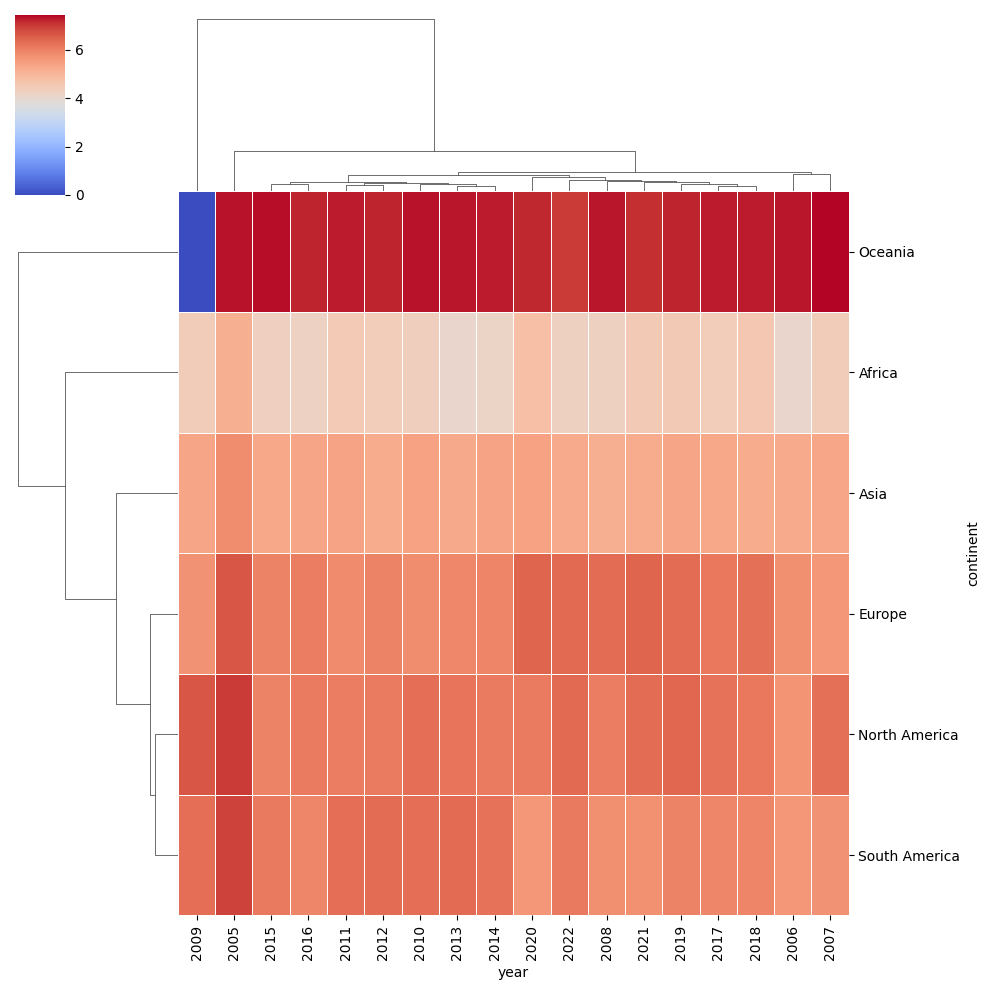

In [ ]:
selected_data = WHRdf1[['continent', 'year', 'happinessScore']]
continent_year_mean = selected_data.groupby(['continent', 'year']).agg({'happinessScore': 'mean'}).reset_index()
# Pivot the dataframe
pivot_df = continent_year_mean.pivot(index='continent', columns='year', values='happinessScore')
pivot_df.fillna(0, inplace = True)
sb.clustermap(pivot_df, row_cluster=True, col_cluster=True, cmap='coolwarm', linewidths=.5, figsize=(10,10))
plt.show()

### Secondary Research Question #3: How does each factor change for each country over the years?

For this question, we will be looking in to changes overtime of the happiness scores and the other factors for each country overtime. Since our dataset has a lot of countrioes to work with, we will filter out the countries and only look at the top six countrys that have had the largest changes (postive and negative) overtime. Not only will we use line graphs to view the happiness scores change overtime, but will will also use line graphs to view the changes of the other factors. With this, we will be able to see patterns within these changes and even explain the changes using real-life events that occured in the respective country. 

Following this, we will create a hypthesis test that will help answer the question as to whether on average, the happiness scores of the countries decreased over time. A confidence interval will also be made to determine, on average, the amount of change the countriy's happiness score faced overtime. 




In [ ]:
# Checking to see how many countries we are dealing with.

WHRdf2["country"].nunique()



165

There are 165 countries in this dataset, which is a lot to work with. 

In [ ]:
# Creating a new dataframe with JUST the happiness score and year variables.
happy_df = pd.DataFrame(WHRdf1, columns=['country', 'happinessScore', 'year'])

happy_df.head()

country  happinessScore  year
0  Afghanistan        3.723590  2008
1  Afghanistan        4.401778  2009
2  Afghanistan        4.758381  2010
3  Afghanistan        3.831719  2011
4  Afghanistan        3.782938  2012

In [ ]:
happy_df.groupby(level = 0, as_index= False).nth([0,-1]).head()

country  happinessScore  year
0  Afghanistan        3.723590  2008
1  Afghanistan        4.401778  2009
2  Afghanistan        4.758381  2010
3  Afghanistan        3.831719  2011
4  Afghanistan        3.782938  2012

In [ ]:
# Creating another dataframe that will be used to store the score differences and year amount columns. 
diff_df = pd.DataFrame(columns = ["Country", "ScoreDifference", "YearsAmount"])


#### *Note: New Column Explanations:*

- ScoreDifference = most recent score - first ever score a country has received.
- YearsAmount = The amout of years a country receievd a happiness score.

In [ ]:
#Adding the information to diff_df 

for country in happy_df['country'].unique():
    
    #current country dataframe
    country_df = happy_df[happy_df['country'] == country]
    
    #Finding difference in happiness score:
    score_diff = country_df['happinessScore'].iloc[-1] - country_df['happinessScore'].iloc[0]
    
    #Finding year difference:
    year_diff = int(country_df['year'].iloc[-1] - country_df['year'].iloc[0])
    
    #Adding country, score difference, and year difference to the diff_df
    diff_df = diff_df.append({'Country': country, 'ScoreDifference': 
                             score_diff, 'YearsAmount' : year_diff}, 
                             ignore_index = True)
    
    

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-90b15f28db79>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
#Checking the new df
diff_df.head(10)

Country  ScoreDifference YearsAmount
0  Afghanistan        -2.442319          14
1      Albania         0.577961          15
2      Algeria        -0.246549          11
3       Angola        -1.794163           3
4    Argentina        -0.051932          16
5      Armenia         1.092632          16
6    Australia        -0.305992          17
7      Austria        -0.123214          16
8   Azerbaijan         0.445518          13
9      Bahrain         0.472652          11

In [ ]:
diff_df.count()

Country            165
ScoreDifference    165
YearsAmount        165
dtype: int64

We still have a lot of values to work with.

In [ ]:
#Checking datatypes

diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          165 non-null    object 
 1   ScoreDifference  165 non-null    float64
 2   YearsAmount      165 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.0+ KB


The Years Ammount column is being identified as a qualitative value. Let's go ahead as fix this. 

In [ ]:
# checking to see if any "weird", non-numerical values somehow made it in the column.

diff_df["YearsAmount"].unique()

# No weird values, I just have to change the data type. 

array([14, 15, 11, 3, 16, 17, 13, 7, 2, 10, 0, 8, 5, 12, 9, 6],
      dtype=object)

In [ ]:
# Changing the data type of the 'YearsAmount' column to numerical (int64, aka integer)

diff_df = diff_df.astype({'YearsAmount':'int64'})



In [ ]:
# Checking the data types one more time to make sure everything is updated. 

diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          165 non-null    object 
 1   ScoreDifference  165 non-null    float64
 2   YearsAmount      165 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


I noticed earlier that some countries my only have a couple of scores recorded throughout the years (e.g. Angola only has 3 scores in this dataset). It would not make sense to compare countries that have a lot of scores to countries that barely have any scores recorded. Due to this, I am going to remove the countries that have less than 5 scores. 

In [ ]:
#filtering the datset, created new dataframe called diff_df2

diff_df2 = diff_df.loc[diff_df["YearsAmount"] >= 5]

diff_df2

Country  ScoreDifference  YearsAmount
0    Afghanistan        -2.442319           14
1        Albania         0.577961           15
2        Algeria        -0.246549           11
4      Argentina        -0.051932           16
5        Armenia         1.092632           16
..           ...              ...          ...
160    Venezuela        -1.220629           17
161      Vietnam         0.972849           16
162        Yemen        -0.280220           12
163       Zambia        -1.742300           15
164     Zimbabwe        -0.530049           16

[154 rows x 3 columns]

In [ ]:
diff_df2['YearsAmount'].unique()



array([14, 15, 11, 16, 17, 13,  7, 10,  8,  5, 12,  9,  6])

The lowest amount of years/scores a country received in this new dataset is 6

In [ ]:
# Arranging the datframe from highest score to lowest score

sorted_diff = diff_df2.sort_values(by = "ScoreDifference", ascending = False).reset_index()


In [ ]:
sorted_diff.head()

index              Country  ScoreDifference  YearsAmount
0     32  Congo (Brazzaville)         1.985126           14
1    107            Nicaragua         1.932099           16
2     52              Georgia         1.617647           16
3     20             Bulgaria         1.534551           15
4    126               Serbia         1.494884           14

In [ ]:
# The three countries that have the largest positive score difference

top_three = sorted_diff[0:3]
top_three

index              Country  ScoreDifference  YearsAmount
0     32  Congo (Brazzaville)         1.985126           14
1    107            Nicaragua         1.932099           16
2     52              Georgia         1.617647           16

In [ ]:
# The three countries that had the largest negative score difference.

bottom_three = sorted_diff[-3:]
bottom_three

index      Country  ScoreDifference  YearsAmount
151     74       Jordan        -1.939054           17
152      0  Afghanistan        -2.442319           14
153     82      Lebanon        -3.138818           17

In [ ]:
# Stacked the two dateframes to make it easier to view.

top_countries = pd.concat([bottom_three, top_three], axis = 0).drop(columns = "index").sort_values(by = 'ScoreDifference', ascending = True)

top_countries

Country  ScoreDifference  YearsAmount
153              Lebanon        -3.138818           17
152          Afghanistan        -2.442319           14
151               Jordan        -1.939054           17
2                Georgia         1.617647           16
1              Nicaragua         1.932099           16
0    Congo (Brazzaville)         1.985126           14

Now that I have determined the top six countries that have had the largst positive and negative score differences, I am going to create a new dataframe that will be mainly used from here on out. This dataframe will have all of the informaton for each country (their scores for the other factors found in WHRd1f). The dataframe will be called "top_six." 


In [ ]:
top_six = WHRdf1.loc[WHRdf1['country'].isin(["Lebanon", "Afghanistan", 
                                               "Jordan", "Georgia", 
                                               "Nicaragua","Congo (Brazzaville)"])].reset_index()


top_six.head(10)

index      country continent      region  year  happinessScore  \
0      0  Afghanistan      Asia  South Asia  2008        3.723590   
1      1  Afghanistan      Asia  South Asia  2009        4.401778   
2      2  Afghanistan      Asia  South Asia  2010        4.758381   
3      3  Afghanistan      Asia  South Asia  2011        3.831719   
4      4  Afghanistan      Asia  South Asia  2012        3.782938   
5      5  Afghanistan      Asia  South Asia  2013        3.572100   
6      6  Afghanistan      Asia  South Asia  2014        3.130896   
7      7  Afghanistan      Asia  South Asia  2015        3.982855   
8      8  Afghanistan      Asia  South Asia  2016        4.220169   
9      9  Afghanistan      Asia  South Asia  2017        2.661718   

   logGdpPerCapita  socialSupport  LifeExpAtBirth  lifeChoicesFreedom  \
0         7.350416       0.450662       50.500000            0.718114   
1         7.508646       0.552308       50.799999            0.678896   
2         7.613900       0.539075       51.099998            0.600127   
3         7.581259       0.521104       51.400002            0.495901   
4         7.660506       0.520637       51.700001            0.530935   
5         7.680333       0.483552       52.000000            0.577955   
6         7.670638       0.525568       52.299999            0.508514   
7         7.653833       0.528597       52.599998            0.388928   
8         7.650370       0.559072       52.924999            0.522566   
9         7.647830       0.490880       53.250000            0.427011   

   generosity  corruptionPreception  positiveAffect  negativeAffect  \
0    0.167652              0.881686        0.414297        0.258195   
1    0.190809              0.850035        0.481421        0.237092   
2    0.121316              0.706766        0.516907        0.275324   
3    0.163571              0.731109        0.479835        0.267175   
4    0.237588              0.775620        0.613513        0.267919   
5    0.062666              0.823204        0.547417        0.273328   
6    0.105755              0.871242        0.491641        0.374861   
7    0.081652              0.880638        0.491410        0.339276   
8    0.043916              0.793246        0.501409        0.348332   
9   -0.119410              0.954393        0.435270        0.371326   

   confInNatGov  
0      0.612072  
1      0.611545  
2      0.299357  
3      0.307386  
4      0.435440  
5      0.482847  
6      0.409048  
7      0.260557  
8      0.324990  
9      0.261179

I am going to visualize each of these factors and compare the top three countries vs the bottom three countries using line graphs.

## Creating the Line Graphs

In [ ]:
colors = ['#FF3E96', '#FF7F00', '#66CD00', '#000080', '#EE0000', '#8B795E']

### Top Countries vs Bottom Countries: Happiness Score 

<ipython-input-96-273dbc7d74e5>:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



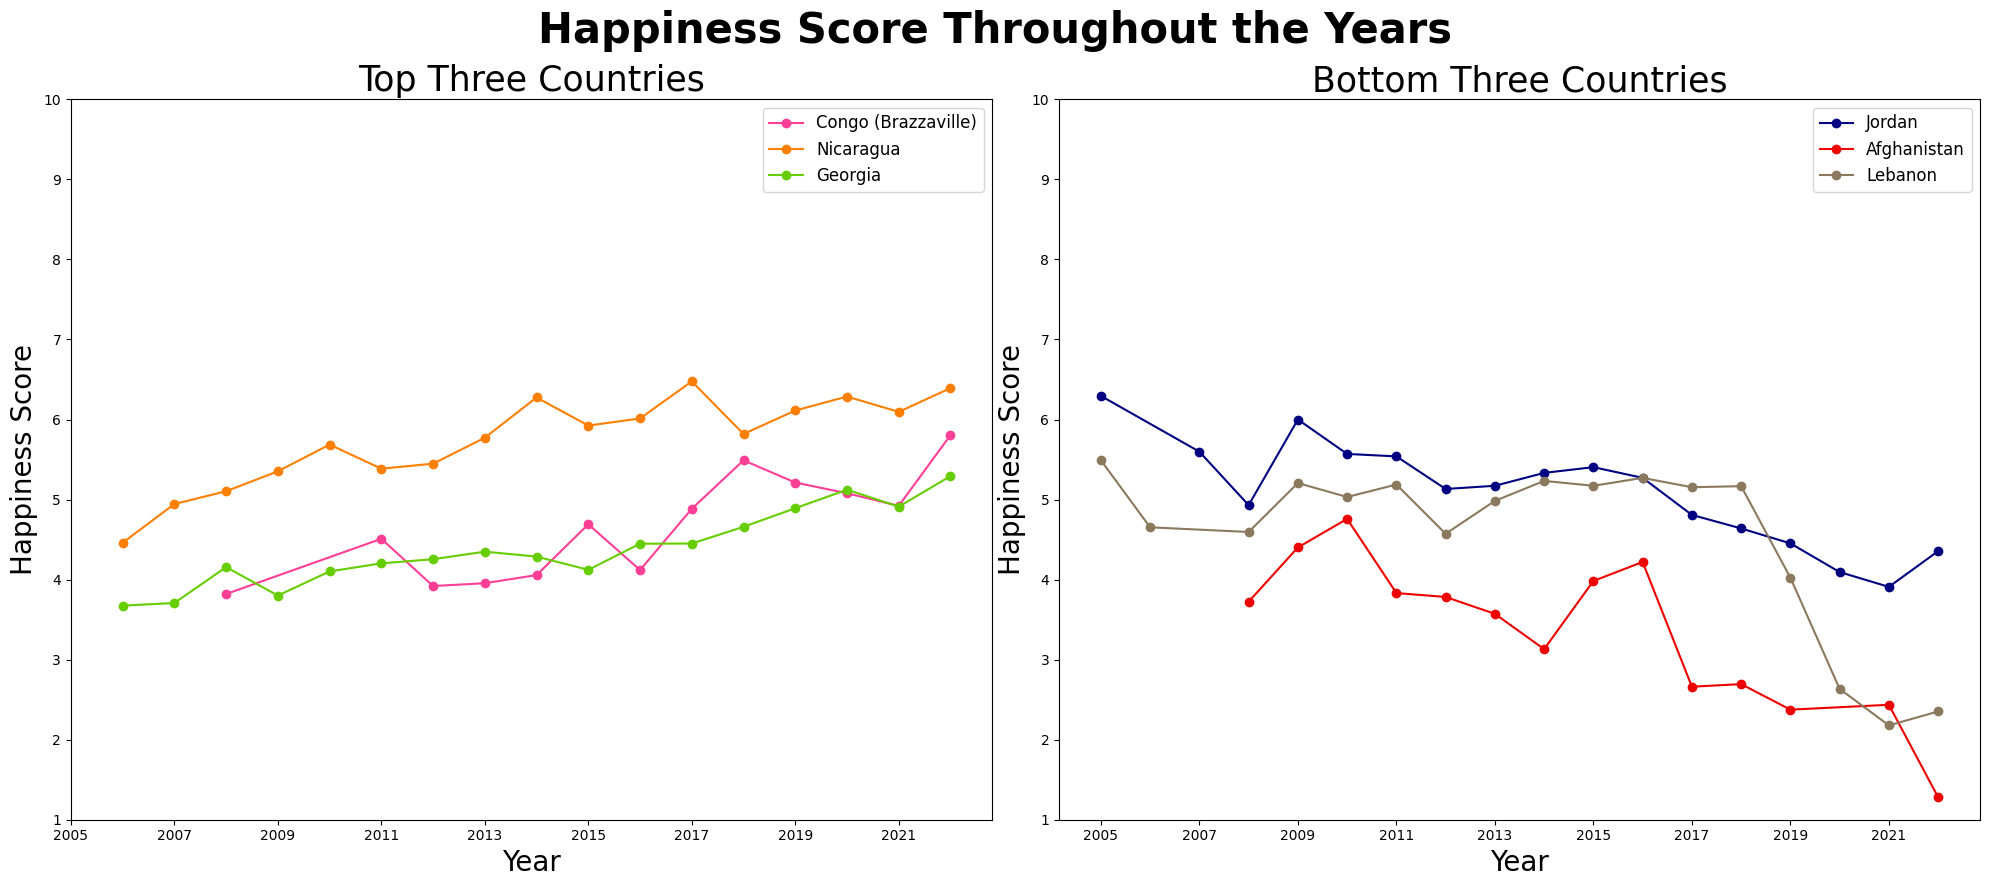

In [ ]:
#Side-by-side line graphs for happiness score :)

plt.subplots(figsize=(20, 9), sharex=True)

num = 0
 
for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['happinessScore'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.ylabel('Happiness Score', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.title('Top Three Countries', 
              fontsize = 25, 
              fontname = "Times New Roman",
             )
    plt.suptitle('Happiness Score Throughout the Years', 
                 fontsize = 30, 
                 fontname="Times New Roman", 
                 fontweight = 'bold')
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = range(1,11),
              fontsize = 10)
    #plt.grid(axis = 'y')
    plt.legend(fontsize = 12)
    
    num += 1

for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['happinessScore'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.ylabel('Happiness Score', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.title('Bottom Three Countries', 
              fontsize = 25, 
              fontname = "Times New Roman")
    plt.tight_layout()
    plt.xticks(ticks=range(2005,2022,2), fontsize = 10)
    plt.yticks(ticks = range(1,11), fontsize = 10)
    #plt.grid(linestyle = '--', linewidth = 0.4) 
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()


#### What is going on above?

The graphs above illustrates the countries that had the largest changes in their happiness scores. For these graphs (and the ones to follow), the left side will represent the three countries that had the largest POSITIVE score change (started low, ended relatively high), while the right side will represent the three countries that had the largest NEGATIVE score change (started high, ended relatively low). Some of these changed changes may be a little more obvious for some countries than others, especially when one looks at the years when these scores started to go up/down hill. It would be really hard to pinpoint exactly what factor/s caused these increase or decreases soleyly based on the happiness score, however we can take a look at all of the factors (visualized below) to make some assumptions as to why these scores changed so dramatically for these countries. 

*Note: The scale of the happiness score factor is 0 to 10*

### Top Countries vs Bottom Countries: Log GDP PerCapita

<ipython-input-97-230d780c5aeb>:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



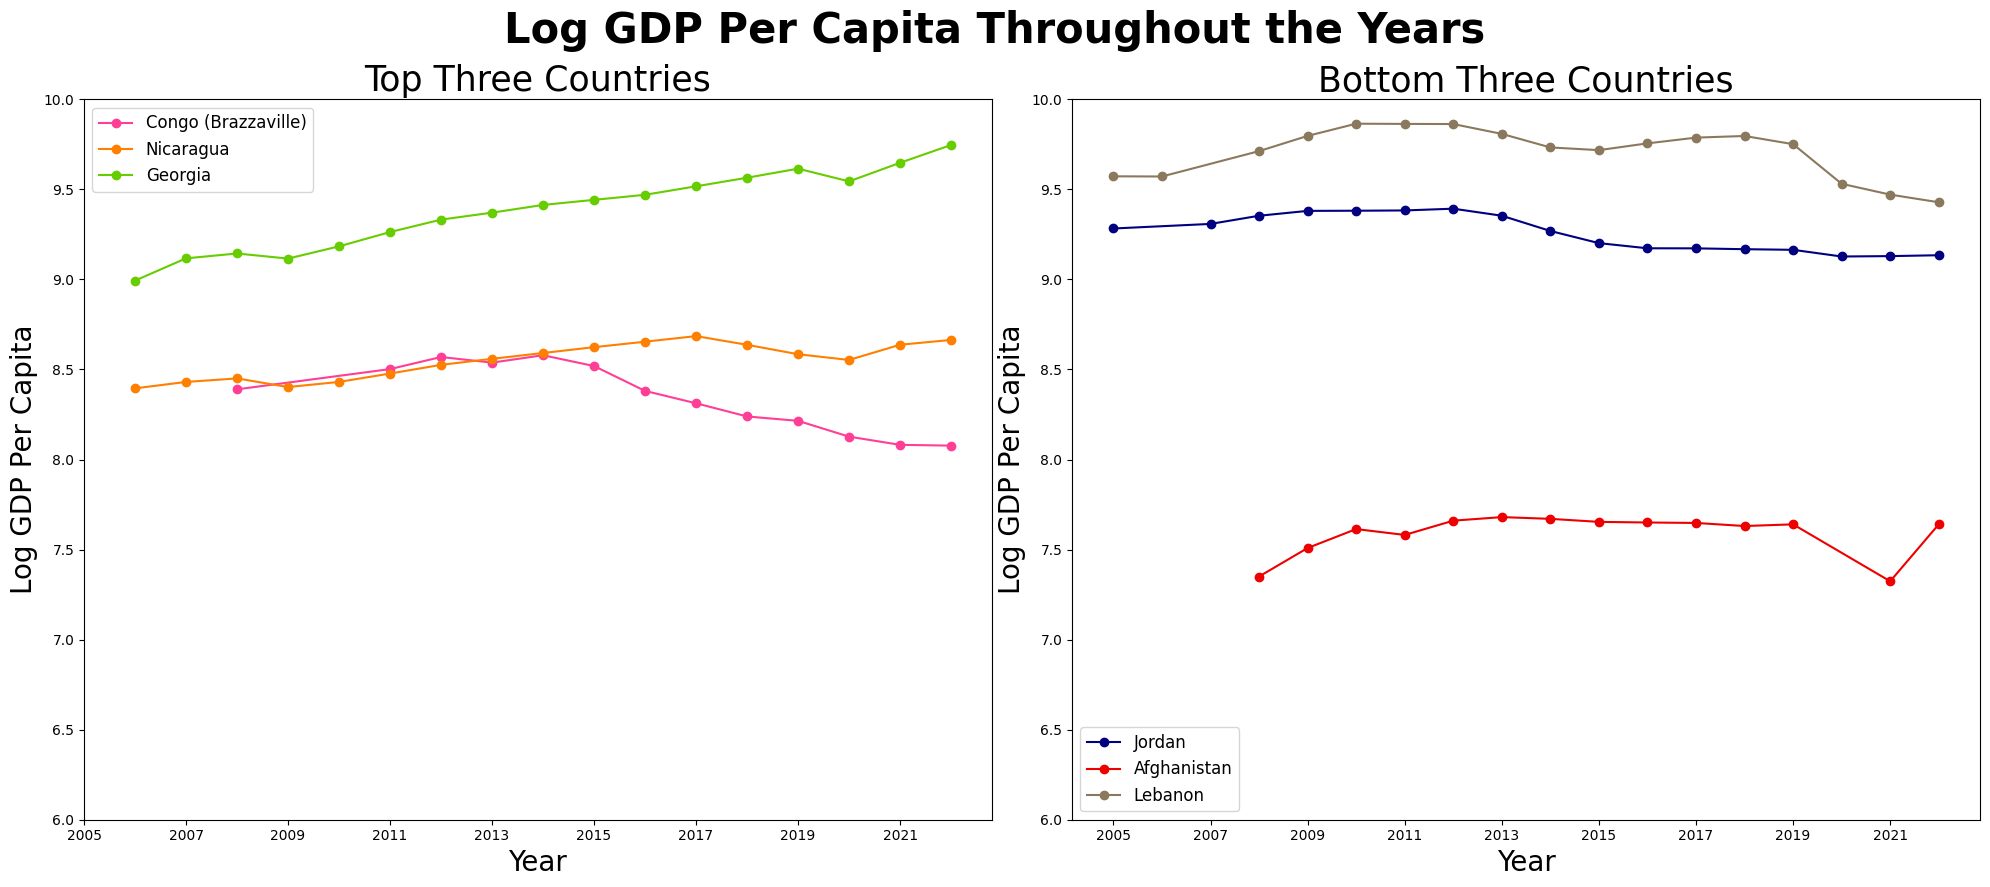

In [ ]:
#logpercapita

plt.subplots(figsize=(20, 9), sharex=True)

num = 0

for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['logGdpPerCapita'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.ylabel('Log GDP Per Capita', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.title('Top Three Countries', 
              fontsize = 25, 
              fontname = "Times New Roman")
    plt.suptitle('Log GDP Per Capita Throughout the Years', 
                 fontsize = 30, 
                 fontname="Times New Roman", 
                 fontweight = 'bold')
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2))
    plt.yticks(ticks = np.arange(6.0, 10.5, 0.5))
    #plt.grid(axis = 'y')
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['logGdpPerCapita'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.ylabel('Log GDP Per Capita', 
               fontname = "Times New Roman", 
               fontsize = 20)
    plt.title('Bottom Three Countries', 
              fontsize = 25, 
              fontname = "Times New Roman")
    plt.tight_layout()
    plt.xticks(ticks=range(2005,2022,2), fontsize = 10)
    plt.yticks(ticks = np.arange(6.0, 10.5, 0.5), fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()


#### What is going on above?

"Log GDP per capita is in terms of Purchasing Power Parity (PPP) adjusted to a constant 2017 international dollars, taken from the World Development Indicators (WDI) by the World Bank (version 17, metadata last updated on January 22, 2023). See Statistical Appendix 1 for more details. GDP data for 2022 are not yet available, so we extend the GDP time series from 2021 to 2022 using country-specific forecasts of real GDP growth from the OECD Economic Outlook No. 112 (November 2022) or, if missing, from the World Bank’s Global Economic Prospects (last updated: January 10, 2023), after adjustment for population growth. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita." ~ The description of this factor from kaggle.com

Log GDP Per Capita seems to either increase steadily and stay relatively the same throughout the countries. The only excpetion is the Republic of Congo, who's Log GDP Per Capita started declining in 2015. This may be due to a fall in oil prices that occured in this country in 2014*, which began the country's economic crisis, as well as the global pandemic further hurting their economy. 

*Link used: https://www.amnesty.org/en/latest/news/2021/04/republic-of-congo-crackdown-on-dissent-as-economic-crisis/

### Top Countries vs Bottom Countries: Social Support

<ipython-input-98-cd2d6bd43d7b>:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



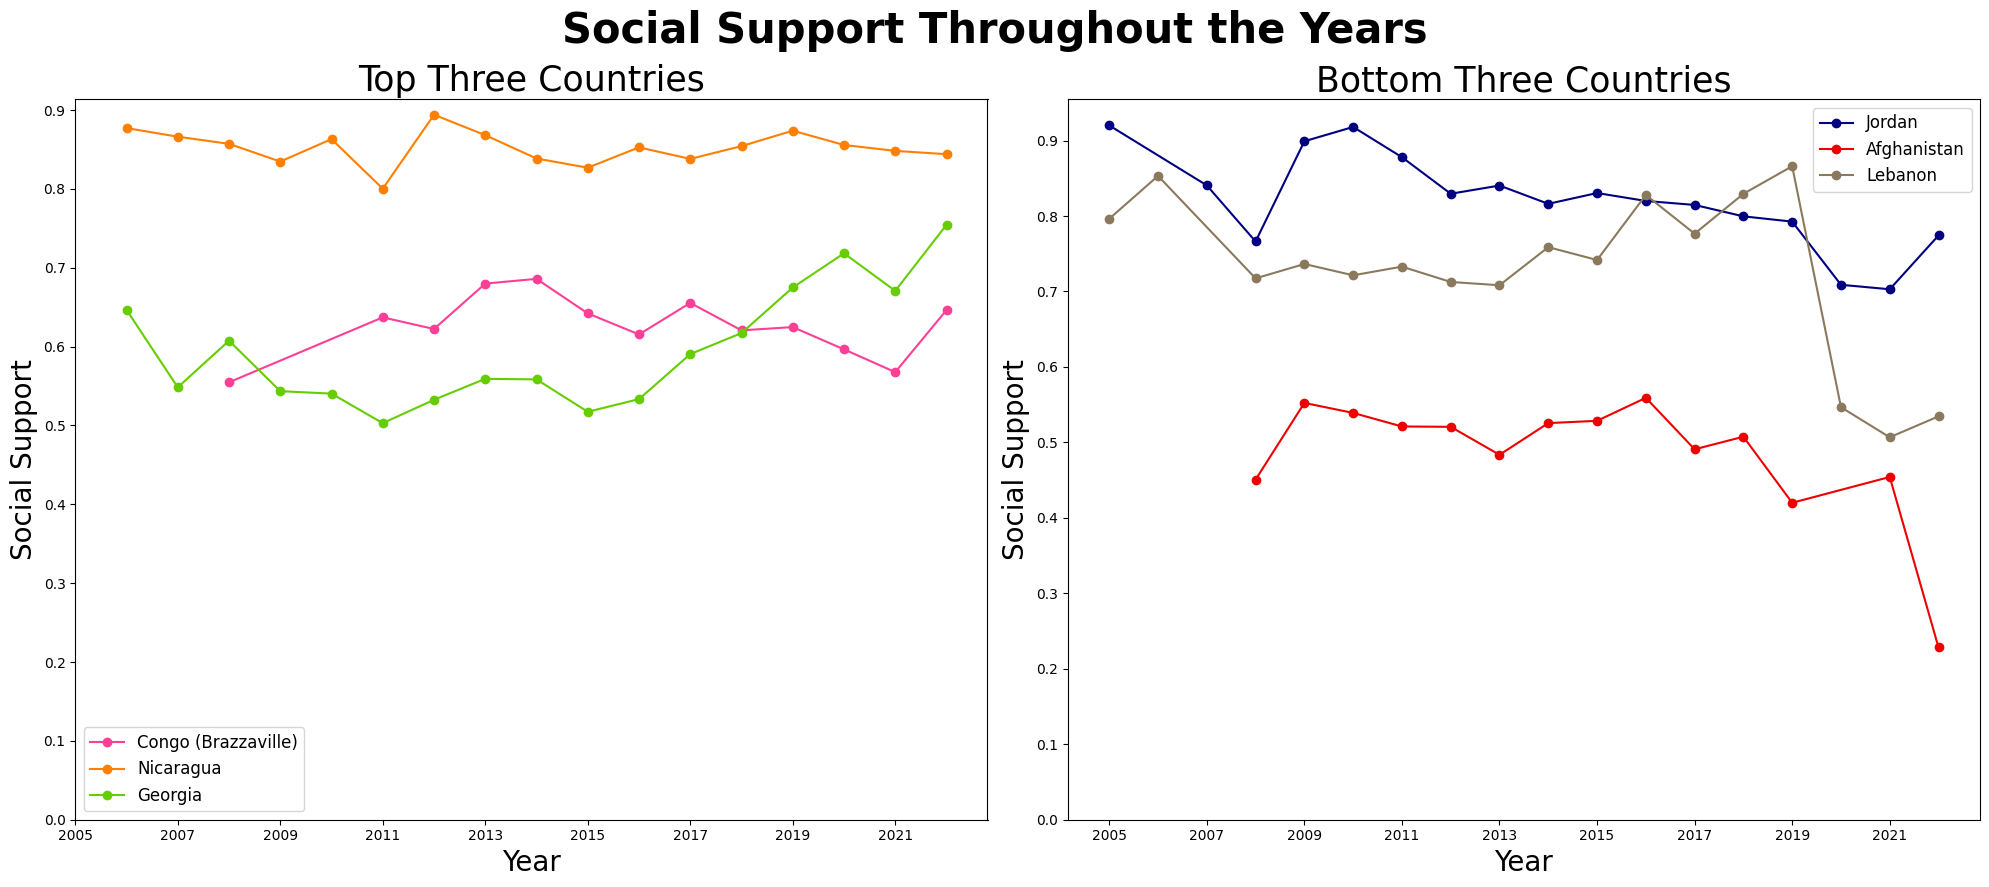

In [ ]:
#Social Support

plt.subplots(figsize=(20, 9), sharex=True)

num = 0

for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['socialSupport'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Social Support',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25
             )
    plt.suptitle('Social Support Throughout the Years', 
                 fontsize = 30, 
                 fontname="Times New Roman", 
                 fontweight = 'bold')
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.0, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['socialSupport'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
               fontname = "Times New Roman",
               fontsize = 20)
    plt.ylabel('Social Support',
               fontname = "Times New Roman",
               fontsize = 20)
    plt.title('Bottom Three Countries',
               fontname = "Times New Roman",
               fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks=range(2005,2022,2), 
               fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.0, 0.1), 
               fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()



#### What is going on above?

"Social support (0-1) is the national average of the binary responses (0=no, 1=yes) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”" ~ The description of this factor from kaggle.com

Simply, the increases in the social support factor suggest that more peole in these countries have strong bonds/support systems with their family or friends. In retrospect, the decrease in social support may suggest that people in these countries may have less bonds, or a lack of a bond/support system with family or friends. 

### Top Countries vs Bottom Countries: Life Expectancy at Birth

<ipython-input-99-fb31d21a6ab1>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



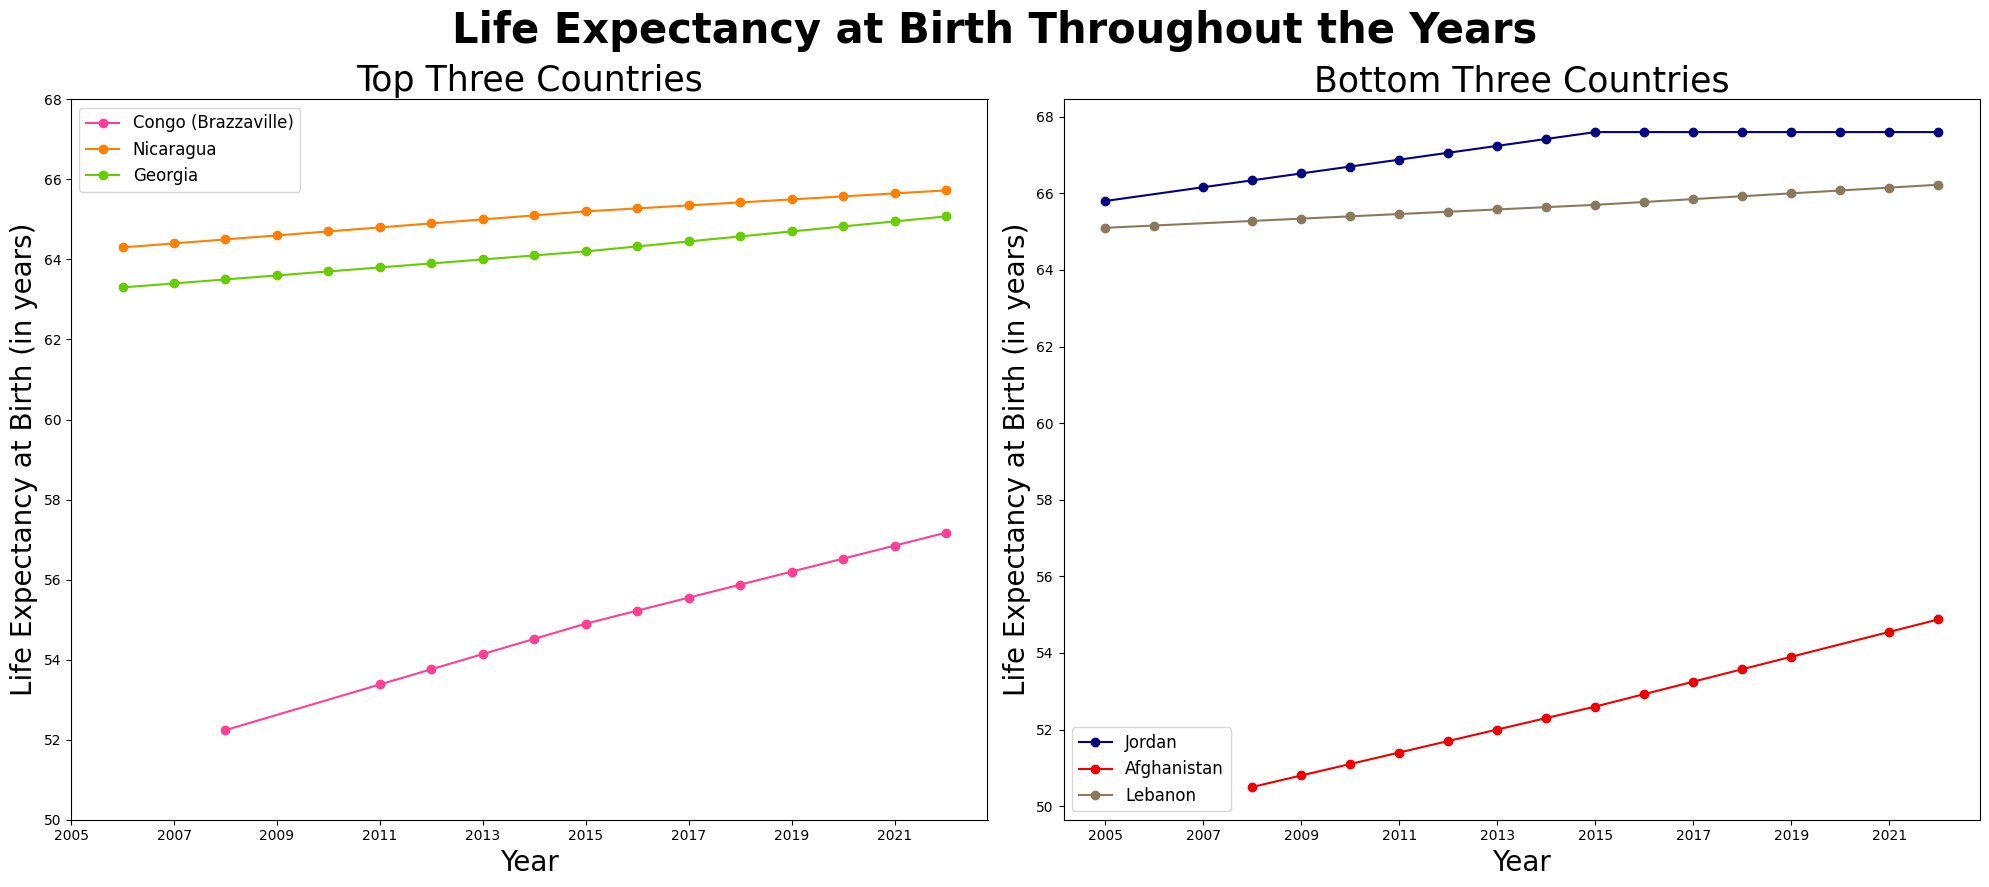

In [ ]:
#LifeExpAtBirth

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['LifeExpAtBirth'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Life Expectancy at Birth (in years)',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Life Expectancy at Birth Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = range(50, 70, 2),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['LifeExpAtBirth'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Life Expectancy at Birth (in years)',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks=range(2005,2022,2), 
              fontsize = 10)
    plt.yticks(ticks = range(50, 70, 2), 
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

##### What is going on above?

Aside from Jordan, who's life expectancy plateaued starting in 2015, each country's life expectancy has been increasing (even in the slightest bit) overtime. Many of these countries have either partner up with international organizations, or have solely worked to better that healthcare infrastructure. For example:


- **In Afghanistan**, there has been a decrease in child mortalities due to the spread of more basic health services such as vaccines that will help infants with diseases, making clinics more available for people, and training health worker volunteers to go into villages to raise awareness for important things like prenatal care. 
    - Link: https://www.npr.org/2014/02/04/269551459/an-afghan-success-story-fewer-child-deaths#:~:text=An%20Afghan%20Success%20Story%3A%20Fewer%20Child%20Deaths%20One%20of%20the,spread%20of%20basic%20health%20services.
    

- **In Georgia**, while high health services prices is still a large problem for its people, there has been an increase in people been able to access publicly financed health coverage. In 2013, Georgia introduced the Universal Health Care Programme which extended access to publicly financed health services to most of the population. Overall, they need to work more on making it more affordable and make the civilians trust primary care providers more as most people go directly to specialists. 
    - Link: https://www.who.int/europe/news/item/12-07-2021-georgia-on-the-path-to-universal-health-coverage-but-gaps-persist
    
    
- **The Republic of Congo** still has a fairly low life expectancy, around 57 years old. However, it has increase alot throughout the years. The country's government began reprioritizing health care in 2009. “Starting with a partnership with the United Nations Population Fund (UNFPA) to reduce maternal mortality,” they are getting help from various organizations to assist with this revamp. Free C-sections were made available as well as more family planning resources in cities. From 2005 to 2012, there has been a 45% decline in maternal mortality. Its only a start however, maternal mortality is still pretty low when compared to other countries. Beginning in 2012, work has extensively been done to focus on revamping the healthcare system as a whole. During this year, the implementation of performance based financing (PBF) with aid of Cordaid (international development organization) began. PBF is “a system in which healthcare providers are funded based on their performance and ability to meet specific objectives. It is utilized as a way to help introduce specific ways of purchasing that help health systems move towards universal health coverage.” The PBF incentivizes health workers so that they can provide more and better care towards patients and create vaccines. Patients feel more comfortable going to doctors, therefore more people may begin going and rates for services go down. Furthermore, The World Bank is helping the Republic of Congo with maternal mortality, child health services, and overall health services and providing free health care for pregnant women and children, and fee exemptions for the poorest households. 
    - Link: https://borgenproject.org/healthcare-in-the-republic-of-congo/
    - Link: https://www.worldbank.org/en/news/press-release/2021/06/02/la-republique-du-congo-renforce-son-systeme-de-sante-en-reponse-la-pandemie-de-covid-19
    


### Top Countries vs Bottom Countries: Life Choices Freedom

<ipython-input-100-28351369406c>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



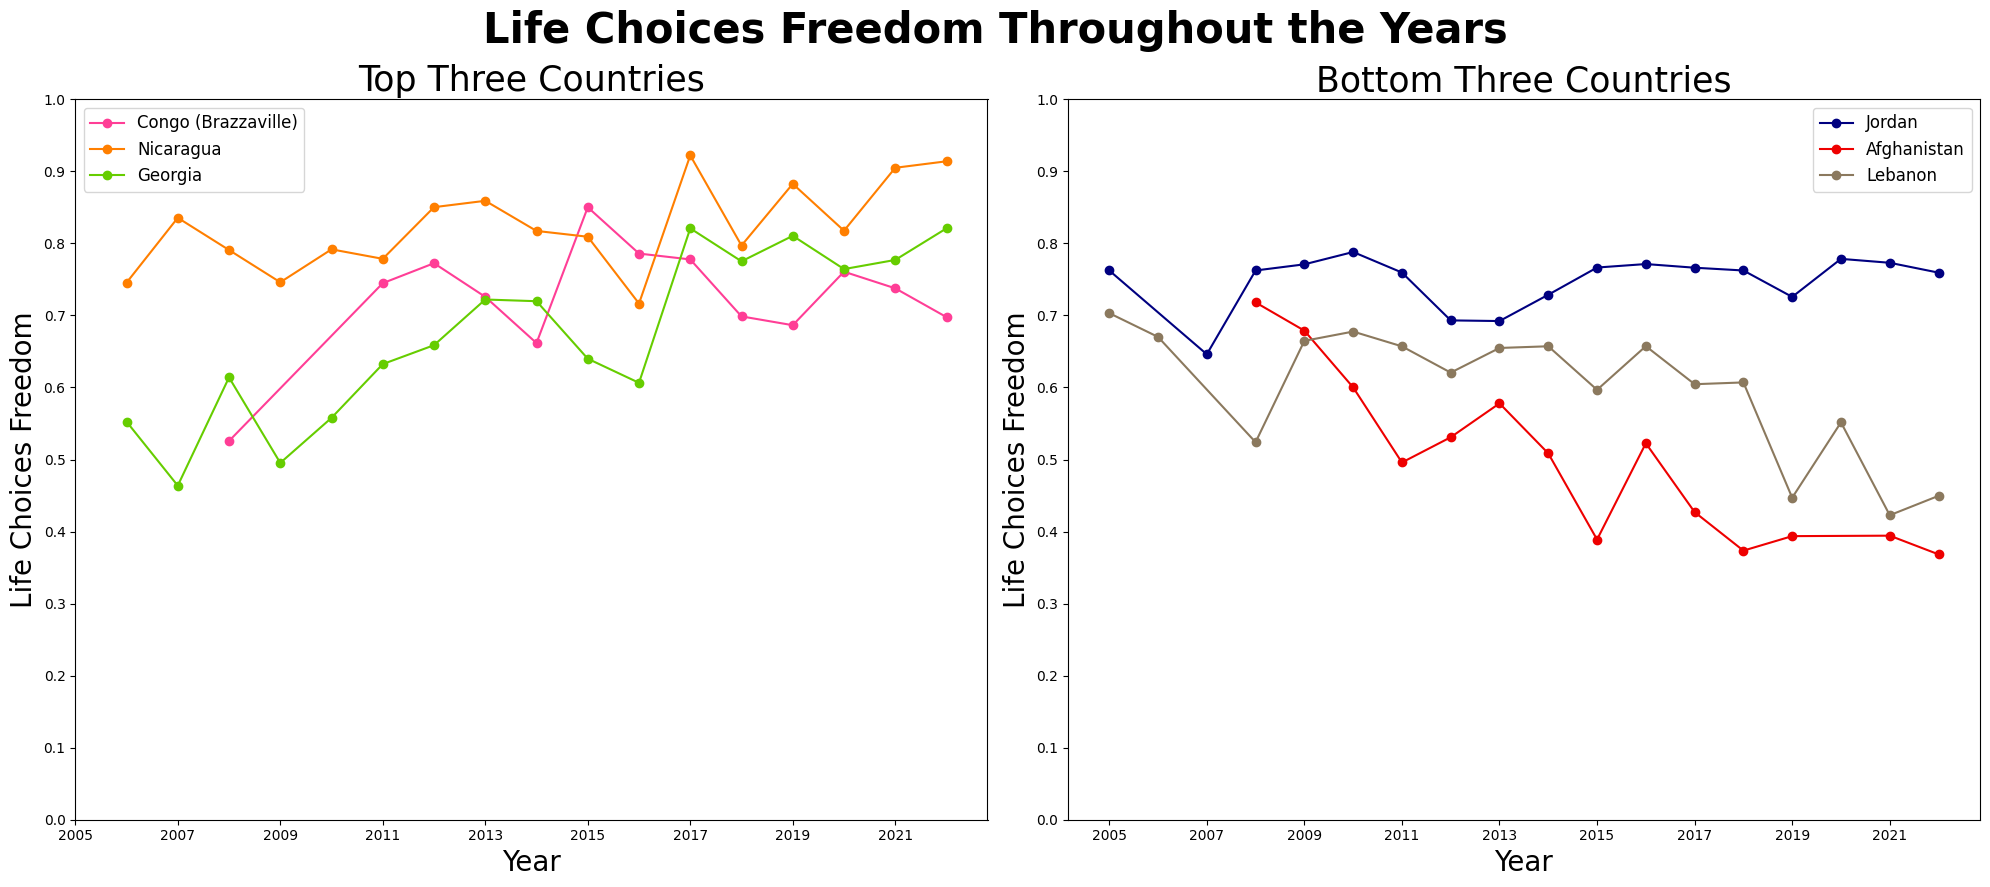

In [ ]:
#lifeChoicesFreedom

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['lifeChoicesFreedom'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Life Choices Freedom',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Life Choices Freedom Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.1, 0.1), 
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['lifeChoicesFreedom'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Life Choices Freedom',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.1, 0.1), 
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What is going on above?

What is interesting here is that when the score increases, life choices freedom also increase. Similarly, when the score decreases, life choices freedom decreases as well. 

### Top Countries vs Bottom Countries: Generosity

<ipython-input-101-fcf8c27737ce>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



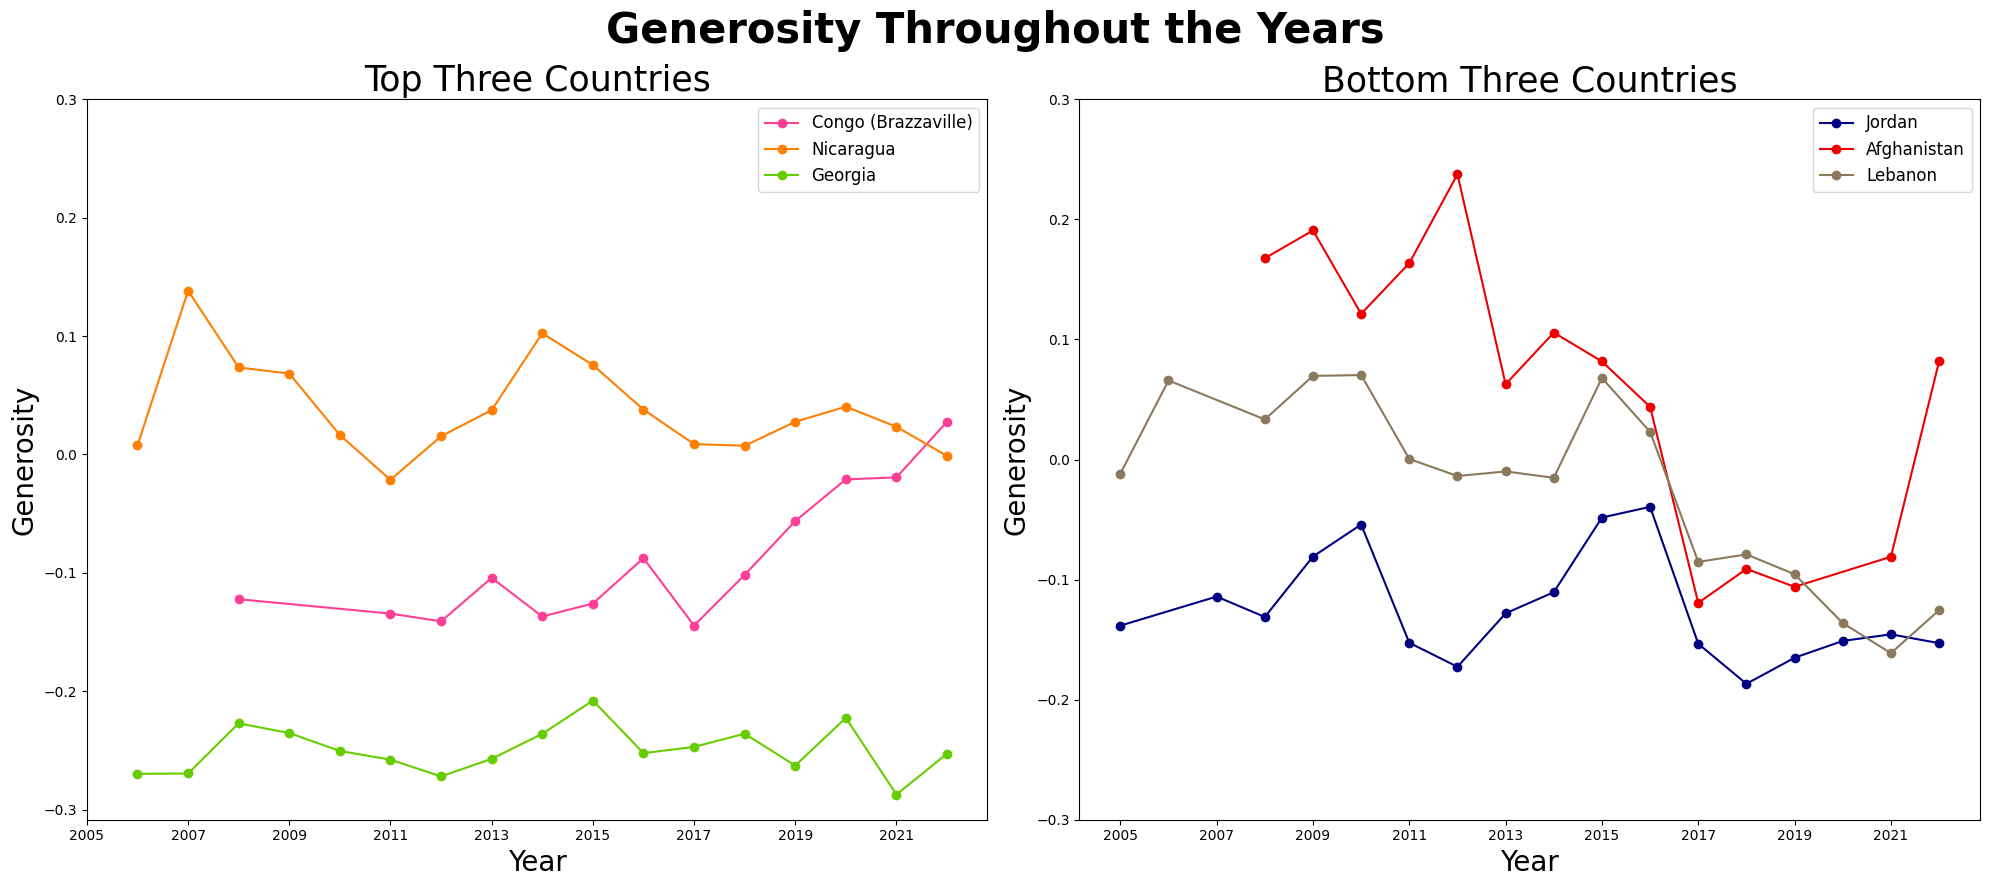

In [ ]:
#generosity

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['generosity'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Generosity',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Generosity Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(-0.3, 0.4, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['generosity'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Generosity',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(-0.3, 0.4, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What is going on above?

As stated on kaggle.com, the generosity factor "is the residual of regressing the national average of GWP responses to the donation question “Have you donated money to a charity in the past month?” on log GDP per capita."

We can see that generosity for Georgia and Nicaragua in 2006 is about the same as the generosity score for 2022. Congo on the otherhand had a sharp increase starting 2018. During this time, the Pool War had recently ended and many people were left displaced. One reason for the spike in generosity could be the donations and help civilians in the country were given to the displaced civilians. 

### Top Countries vs Bottom Countries: Corruption Perception

<ipython-input-102-e3a4d33ed3f6>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



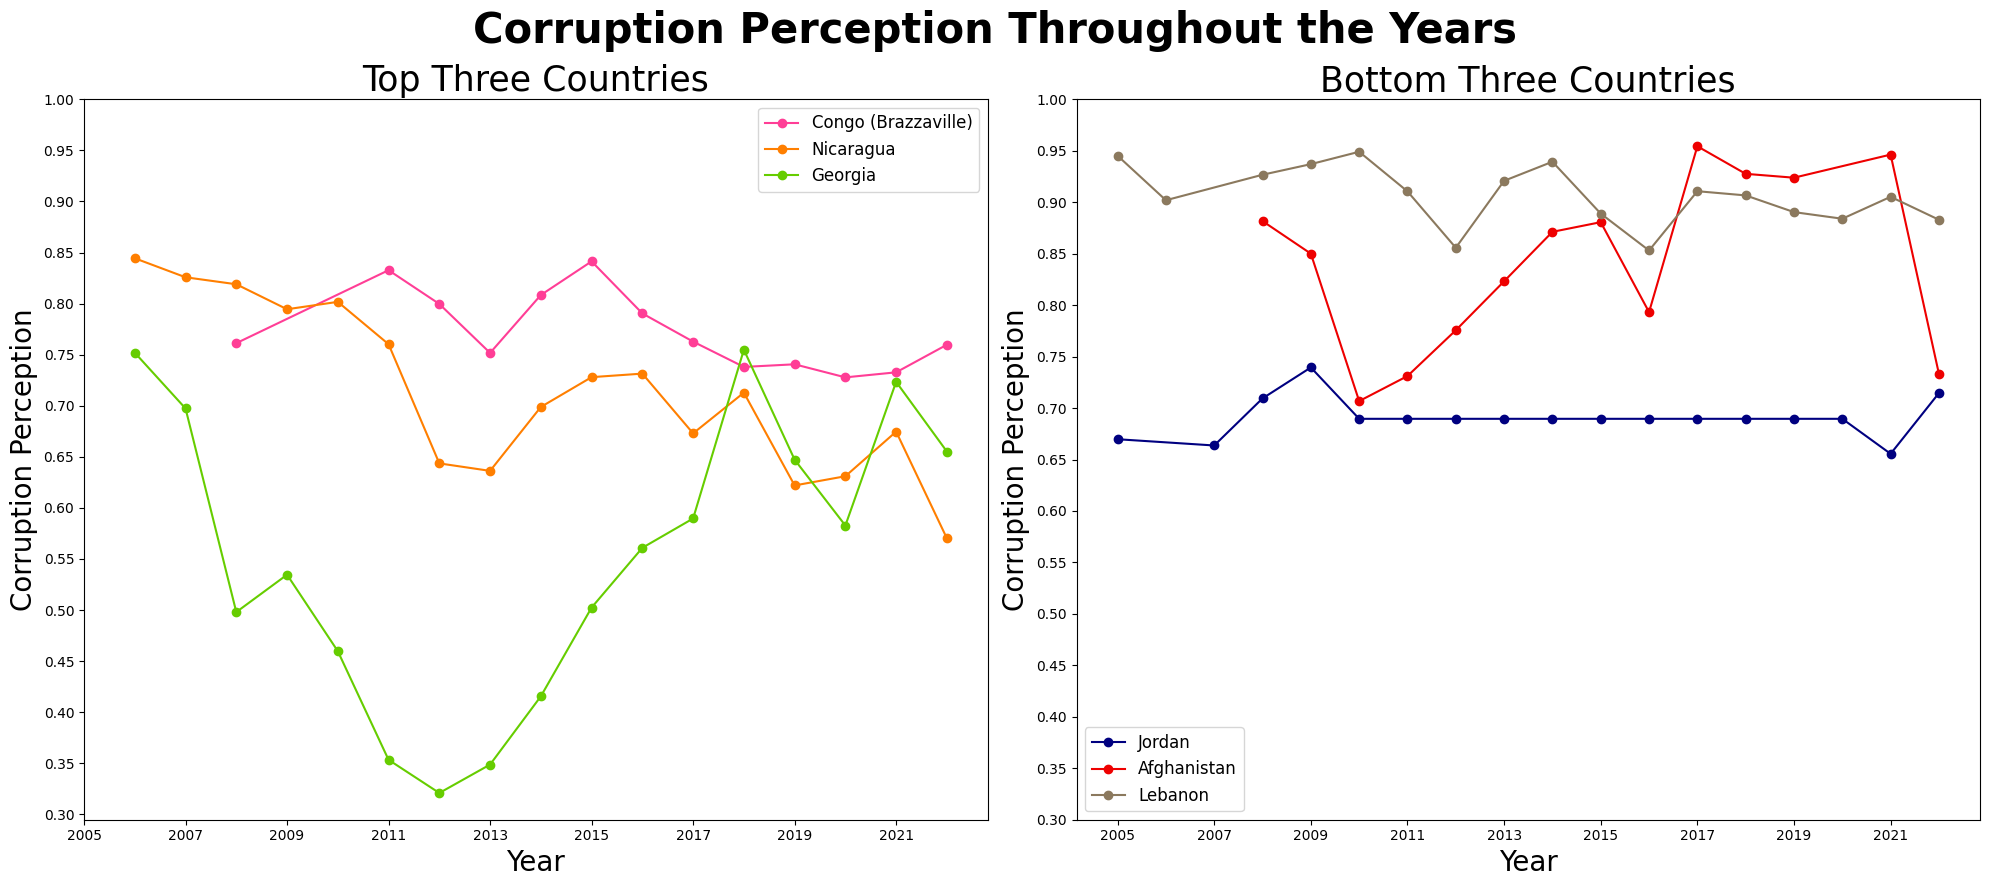

In [ ]:
#corruptionPreception

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['corruptionPreception'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Corruption Perception',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Corruption Perception Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.3, 1.05, 0.05),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['corruptionPreception'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Corruption Perception',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.3, 1.05, 0.05),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What is going on above?

"“Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption perception measure.""

Nicaragua: 
   - The drop of score between 2017 and 2018 may be due to the hundreds of people either arrested or abducted by the National Police and armed forces due to the country cracking down on protesters (protesting began on April 18, 2018 against the country's president Daniel Ortega). Many of these people faced tortorous conditions, injured, denied medical care, Medical professions were faced with retaliation if they were found to medically assist the detainees. Furthermore, the government also targeted journalists, media outlets, and anybody and group who have reported on the government’s crackdown on the protesters. In March of 2019, the government agreed to release all people who were detained in connection with the protest and drop the charges against them. “High-level Nicaraguan officials have not taken steps to prevent and punish human rights violations, including torture.” There seems to be a lack of accountability of high-level officials. 
      - Link: : https://www.hrw.org/report/2019/06/19/crackdown-nicaragua/torture-ill-treatment-and-prosecutions-protesters-and
      
   - There's talk from members of the political opposition that Nicaragua’s President and his wife control all public institution, practice authoritarian power, and threaten democracy and basic civil freedoms
       - Link: https://www.npr.org/sections/goatsandsoda/2017/04/13/522763672/how-can-nicaragua-be-so-happy-when-it-has-a-stack-of-sad-statistics

Overall, the corruption scores started and ended with the same scores. 


### Top Countries vs Bottom Countries: Positive Affect (Emotions)

<ipython-input-103-596c91783eec>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



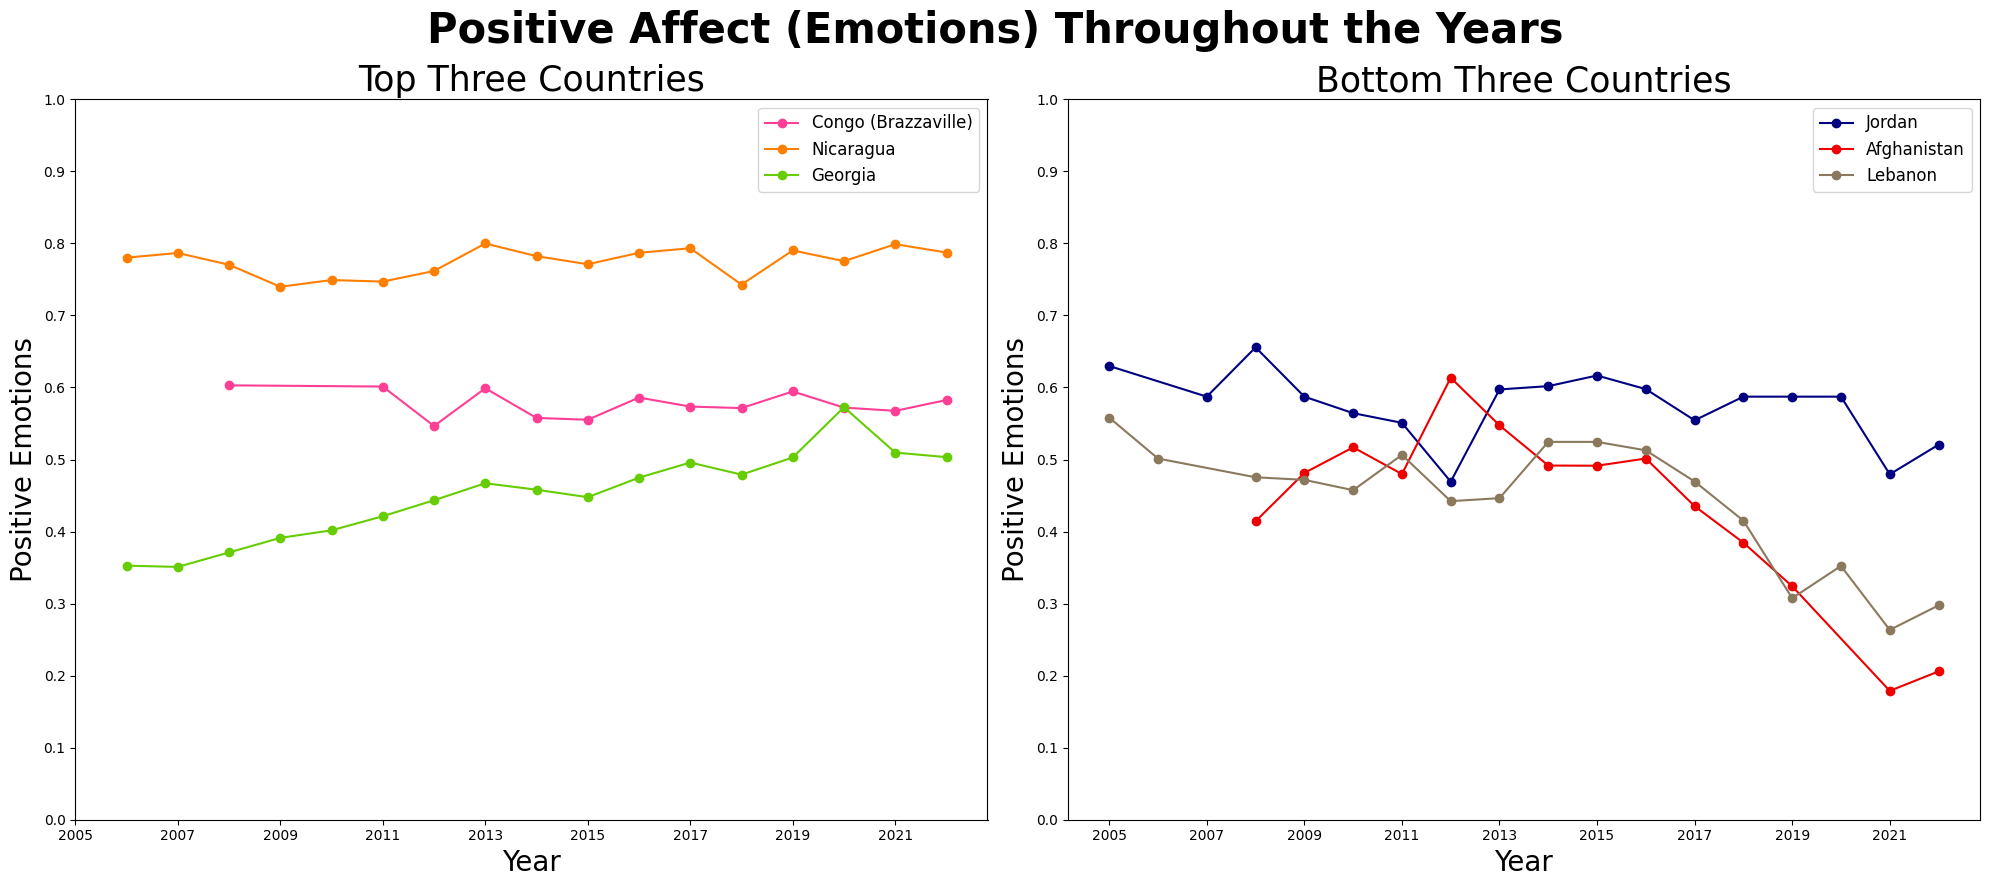

In [ ]:
#positiveAffect

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['positiveAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Positive Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Positive Affect (Emotions) Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2), 
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.1, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['positiveAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Positive Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2), 
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 1.1, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What is going on above?

"Positive affect is defined as the average of previous-day effects measures for laughter, enjoyment, and interest. The inclusion of interest (first added for World Happiness Report 2022), gives us three components in each of positive and negative affect, and slightly improves the equation fit in column 4. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday?" ~ The description of this factor from kaggle.com

For the top three coountries, the potive affect score remained relatively the same throughout the years. The only exceptionb is Georgia, in which it slightly increased when comparing its recent score to its first score.

On the otherhand, the bottom three country's postive affect score decreased throughout the years, with Afghanistan's and Lebanon's score plummting starting around the year 2016.
   - In Lebanon, 2018 was the year of their parliamentary elections. The parties failed to make public ocmmitments to strengthen human rights protections and human rigths violations persisted throughout the year. Women faced severe discrimination and both child marriage and martial rape remained legal in Lebanon. 
   
        - Link: https://www.hrw.org/world-report/2019/country-chapters/lebanon
        
   - 2019 was the start of Lebanon's peaceful protests against their political representatives which was met with violence by Lebanon's military, a deadly explosion in 2020 (in the midst of the global pandemic, financial and political crisis), which also explains the substantial decrease in the country's happiness score (dropping about 3 points). 
       
       - Link: https://www.amnesty.org/en/latest/news/2019/11/lebanon-protests-explained/
   
       
   - Afghanistan during this time was still involved in a war. 

### Top Countries vs Bottom Countries: Negative Affect (Emotions)

<ipython-input-104-3233abac1d0d>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



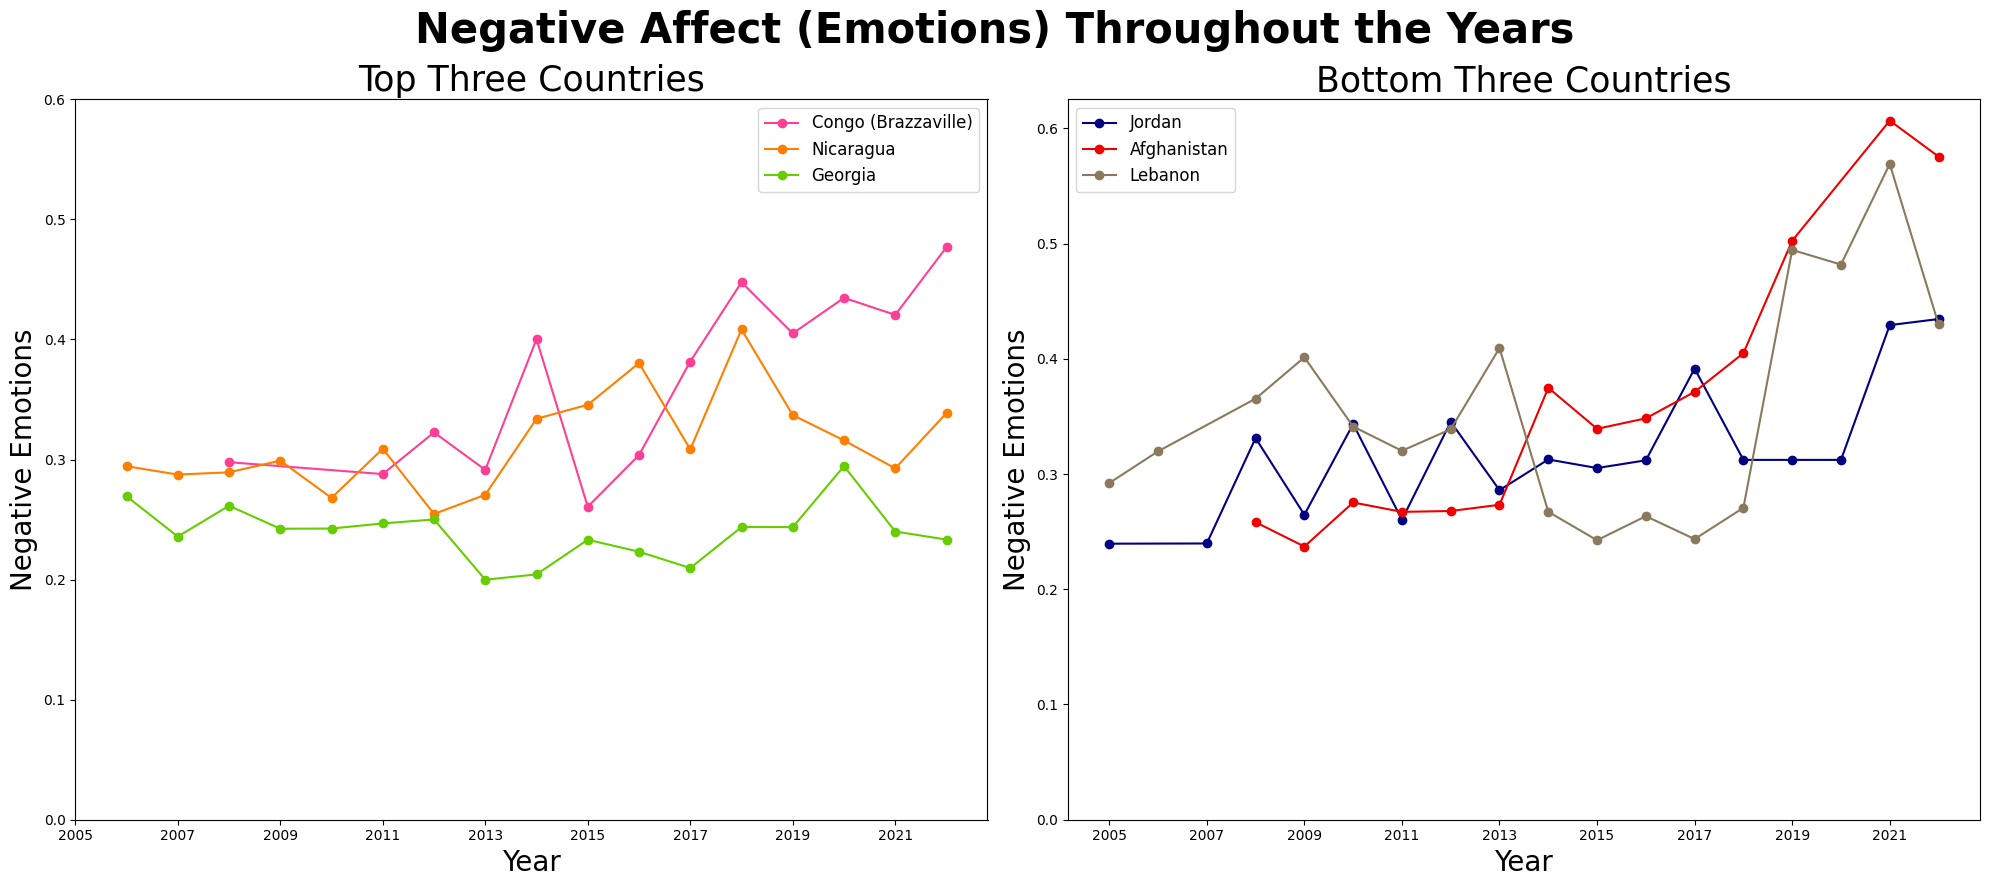

In [ ]:
#negativeAffect

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['negativeAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Negative Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Negative Affect (Emotions) Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 0.7, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['negativeAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Negative Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 0.7, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What's going on above?

" Negative affect is defined as the average of previous-day effects measures for worry, sadness, and anger." ~ The description of this factor from kaggle.com

Even though the top three country's postive Affect factor generally remained the same overtime, their negative effect score seemed to rise throughout the years (except for Georgia, whose score slightly decreased). Poverty in Nicaragua and Congo is still a large problem throughout the countries, as well as widespread corruption throughout the country's governments. 

Simarly, the bottom three countries also faced an increase in their negative affect factor score throughout the years. 

### Top Countries vs Bottom Countries: Negative Affect (Emotions)

<ipython-input-105-3233abac1d0d>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



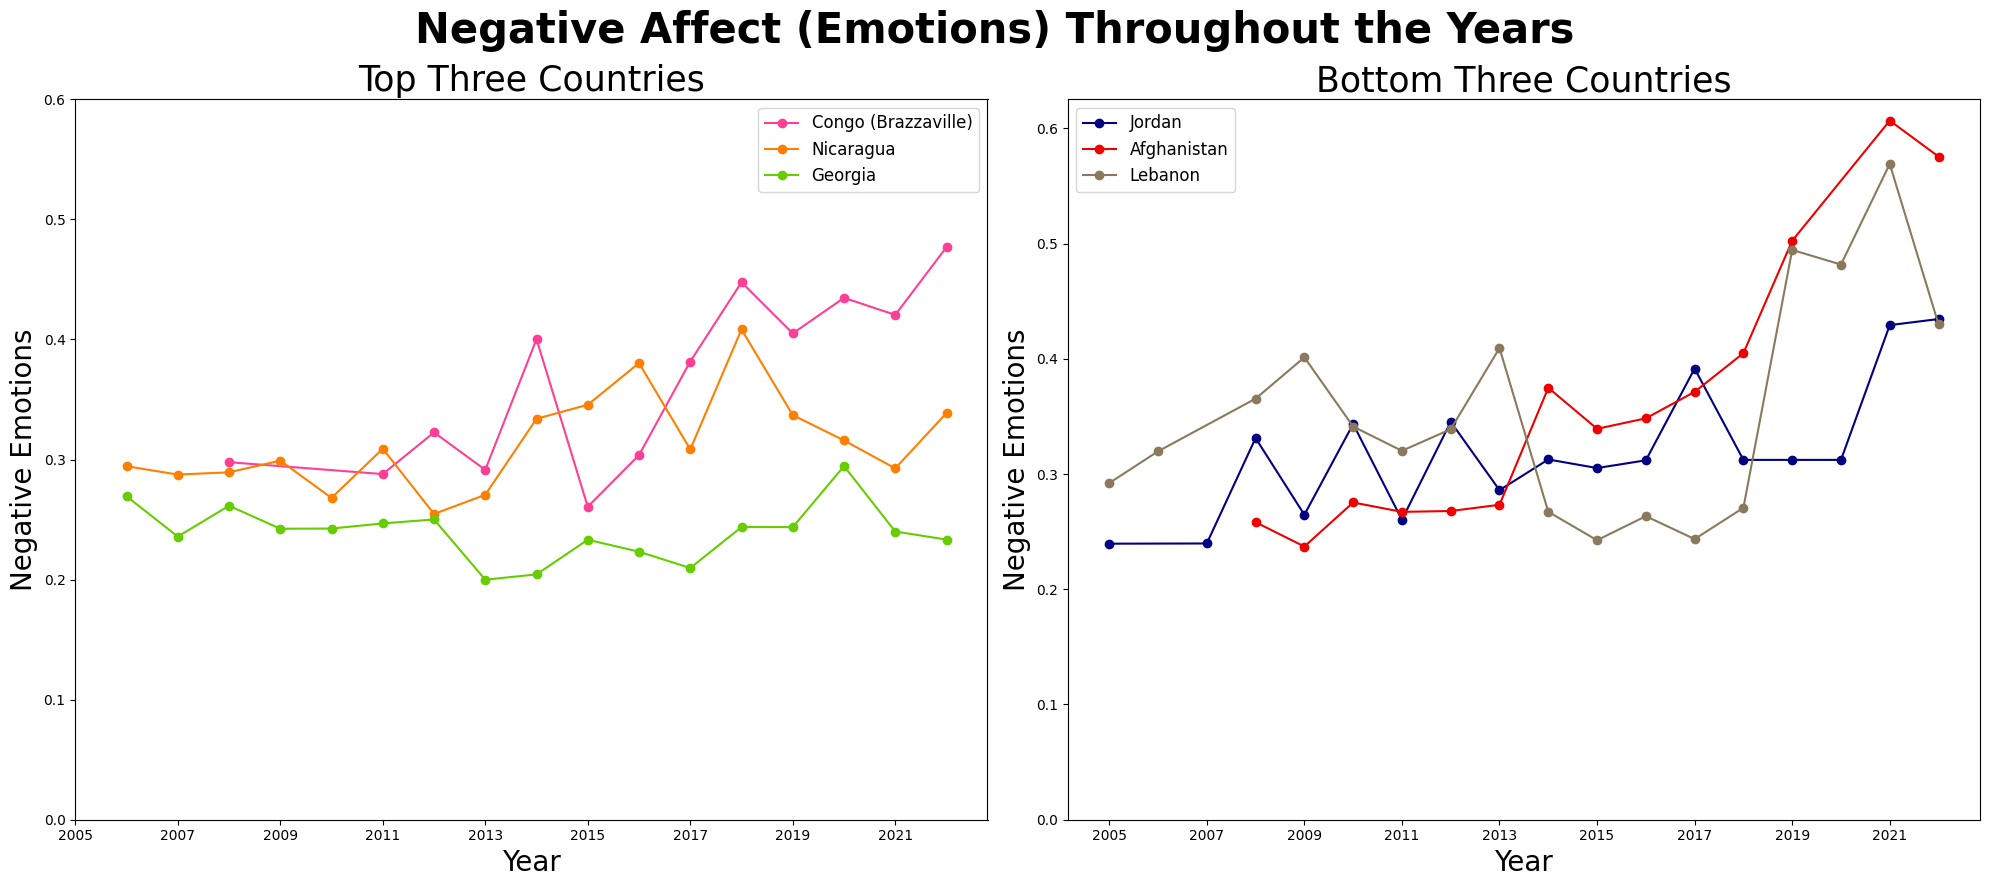

In [ ]:
#negativeAffect

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['negativeAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Negative Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Negative Affect (Emotions) Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 0.7, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['negativeAffect'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Negative Emotions',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2),
              fontsize = 10)
    plt.yticks(ticks = np.arange(0.0, 0.7, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What's going on above?

" Negative affect is defined as the average of previous-day effects measures for worry, sadness, and anger." ~ The description of this factor from kaggle.com

Even though the top three country's postive Affect factor generally remained the same overtime, their negative effect score seemed to rise throughout the years (except for Georgia, whose score slightly decreased). Poverty in Nicaragua and Congo is still a large problem throughout the countries, as well as widespread corruption throughout the country's governments. 

Simarly, the bottom three countries also faced an increase in their negative affect factor score throughout the years. 

### Top Countries vs Bottom Countries: Confidence in National Government 

<ipython-input-106-16bee26670bb>:14: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



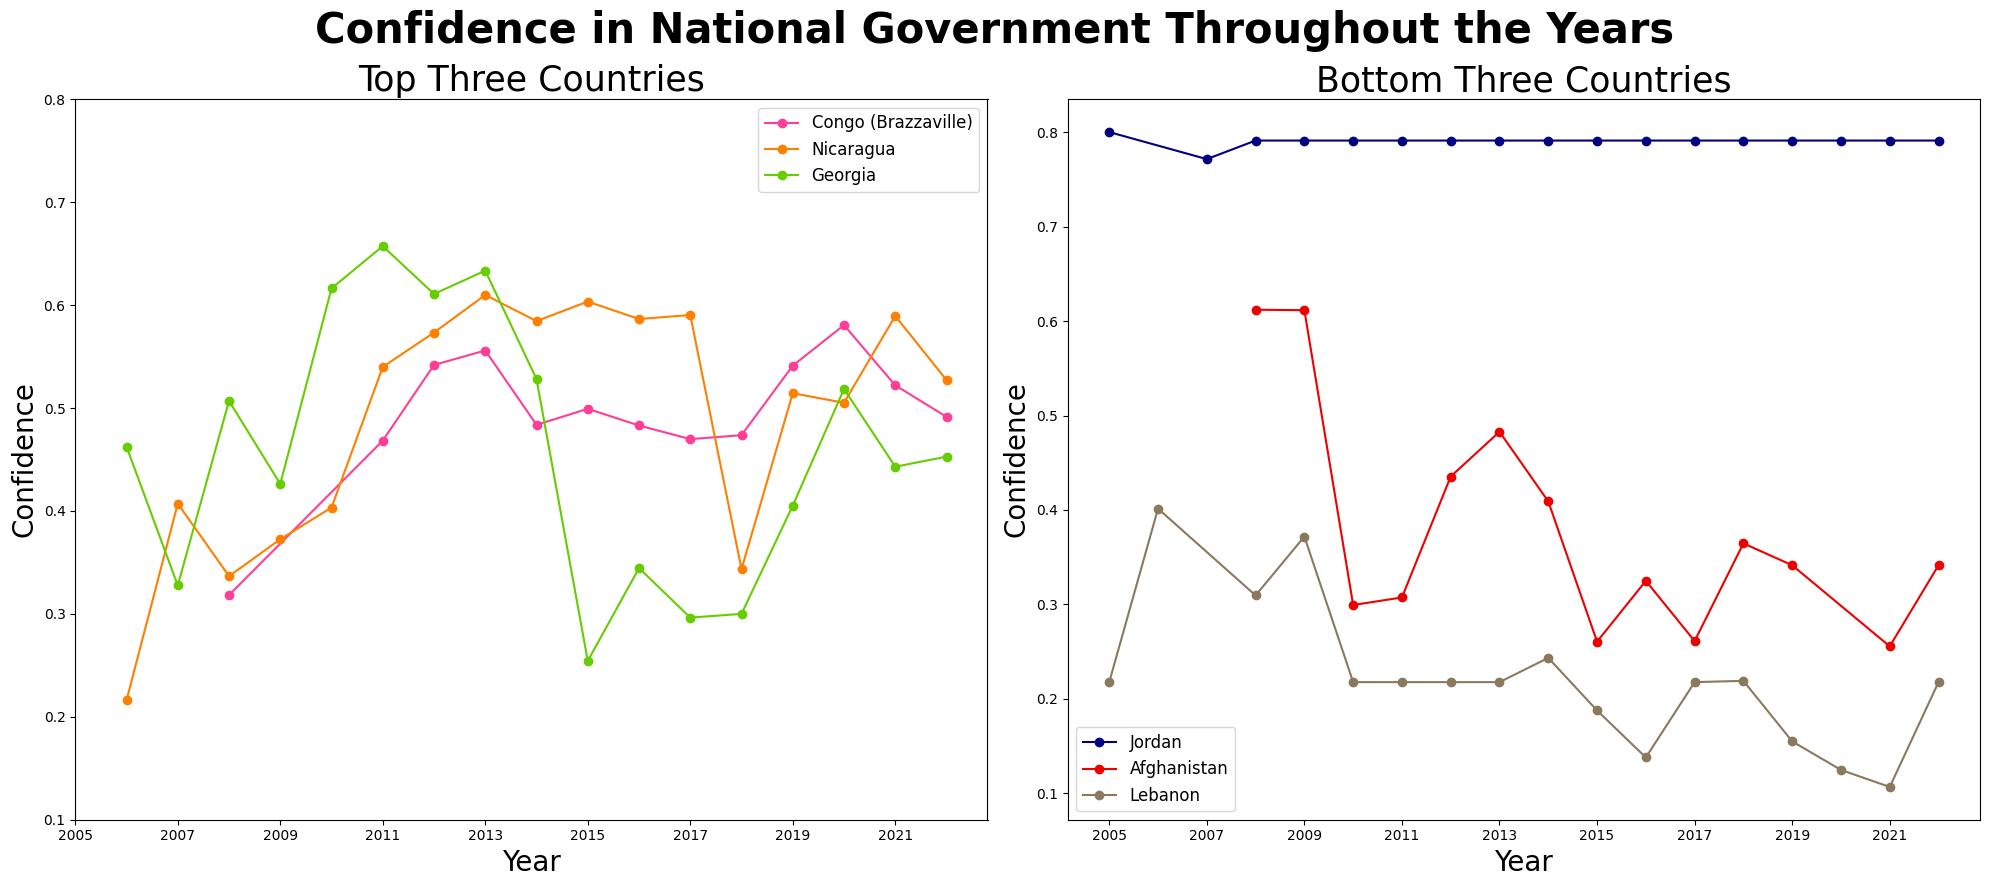

In [ ]:
#confInNatGov

plt.subplots(figsize=(20, 9), sharex=True)

num = 0


for i in top_three['Country'].unique():
    country_name = i
    label_name = i

    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 1)
    plt.plot(country_df['year'], 
             country_df['confInNatGov'], 
             label = label_name, 
             color = colors[num], 
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Confidence',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Top Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.suptitle("Confidence in National Government Throughout the Years",
              fontname = "Times New Roman",
              fontsize = 30,
              fontweight = "bold")
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2), 
               fontsize = 10)
    plt.yticks(ticks = np.arange(0.1, 0.9, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


for r in bottom_three['Country'].unique():
    country_name = r
    label_name = r
 
    country_df = top_six[top_six['country'] == country_name]

    plt.subplot(1, 2, 2) 
    plt.plot(country_df['year'], 
             country_df['confInNatGov'], 
             label = label_name, 
             color = colors[num],
             marker='o')
    plt.xlabel('Year',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.ylabel('Confidence',
              fontname = "Times New Roman",
              fontsize = 20)
    plt.title('Bottom Three Countries',
              fontname = "Times New Roman",
              fontsize = 25)
    plt.tight_layout()
    plt.xticks(ticks = range(2005,2022,2), 
               fontsize = 10)
    plt.yticks(ticks = np.arange(0.1, 0.9, 0.1),
              fontsize = 10)
    plt.legend(fontsize = 12)
    
    num += 1


plt.show()

#### What's going on above?

The civilians in the top three countries have on average increased their confidence in their National Government (except from Georgia, whose confidence started and ended around the same score). Even though these countries are still facing many problems within their countries, this increase suggests that their governments are working to implement laws and policies that may try and help their people, as way as help their economy. For example:
   - There are progressions in Nicaragua on their economy and job opportunities for their civilians. 
   - Congo's and Georgia's, as stated before, government is trying to restructure their health care infrastructure in order for it to be more avaiable to its civilians. 
   
For the bottom three countries, the confidence in their national governemtns has decreased in Afghanistan, and remained somewhat the same in Jordan and Lebanon. 



## Hypothesis Test

The question I am asking: Overall, is the happiness score for the countries decreasing overtime?

**Null Hypothesis**: score mean = 0 

**Alternative Hypothesis**: score mean < 0

I will use the diff_df2 to create a new dataframe that will it have all the countries with 5 or more scores, and will only have a Score Difference column, which I will be using to perform this hypothesis test. 

##### Note this will be a left tailed test

In [ ]:
# creating new df from diff_d2

only_scorediff = diff_df2[['Country','ScoreDifference']]

only_scorediff.head()
                                  

Country  ScoreDifference
0  Afghanistan        -2.442319
1      Albania         0.577961
2      Algeria        -0.246549
4    Argentina        -0.051932
5      Armenia         1.092632

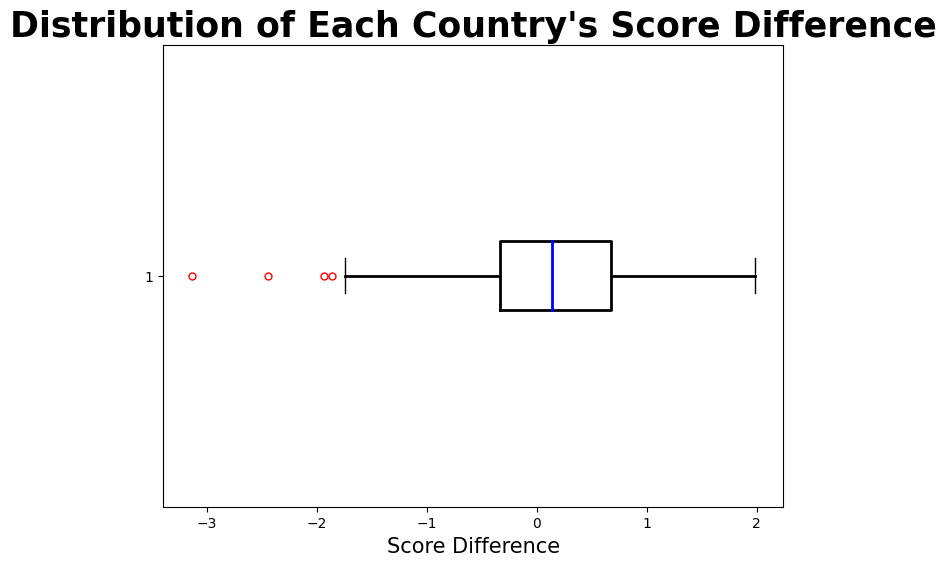

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(only_scorediff["ScoreDifference"], 
           vert = False,
           boxprops = dict(linewidth=2),
           whiskerprops=dict(linewidth=2),
           medianprops=dict(linewidth=2, color='blue'),
           flierprops=dict(marker='o', markersize=5, markeredgecolor='red'))

ax.set_title("Distribution of Each Country's Score Difference", 
             fontname = "Times New Roman",
             fontsize = 25,
             fontweight = 'bold')
ax.set_xlabel("Score Difference", 
             fontname = "Times New Roman",
             fontsize = 15)

plt.show()



There seems to be four outliers in this dataset. In order to continue with my hpithesis test, I will remove these four outliers using the IQR method.

In [ ]:
# Identifying Outliers Using the IQR method

In [ ]:
q1, q3 = np.percentile(only_scorediff['ScoreDifference'], [25, 75])

In [ ]:
q1

-0.33606827225000013

In [ ]:
q3

0.671774745

In [ ]:
iqr = q3 - q1
iqr

1.0078430172500001

In [ ]:
lower_bound = q1 - 1.5*iqr
lower_bound

-1.8478327981250005

In [ ]:
upper_bound = q3 + 1.5*iqr
upper_bound

2.1835392708750003

In [ ]:
outliers = only_scorediff[(only_scorediff['ScoreDifference'] < lower_bound) | (only_scorediff['ScoreDifference'] > upper_bound)]
outliers

Country  ScoreDifference
0    Afghanistan        -2.442319
74        Jordan        -1.939054
82       Lebanon        -3.138818
143        Syria        -1.861419

These are the four countries with the score difference outliers. Let's create another df that will NOT have these countries in it.

In [ ]:
the_outliers = ['Afghanistan','Jordan', 'Lebanon', 'Syria']


clean_df = only_scorediff[only_scorediff.Country.isin(the_outliers) == False]
clean_df

# the clean_df has NO OUTLIERS


Country  ScoreDifference
1      Albania         0.577961
2      Algeria        -0.246549
4    Argentina        -0.051932
5      Armenia         1.092632
6    Australia        -0.305992
..         ...              ...
160  Venezuela        -1.220629
161    Vietnam         0.972849
162      Yemen        -0.280220
163     Zambia        -1.742300
164   Zimbabwe        -0.530049

[150 rows x 2 columns]

In [ ]:
# Checking box plot once again to see if all the outliers are gone.

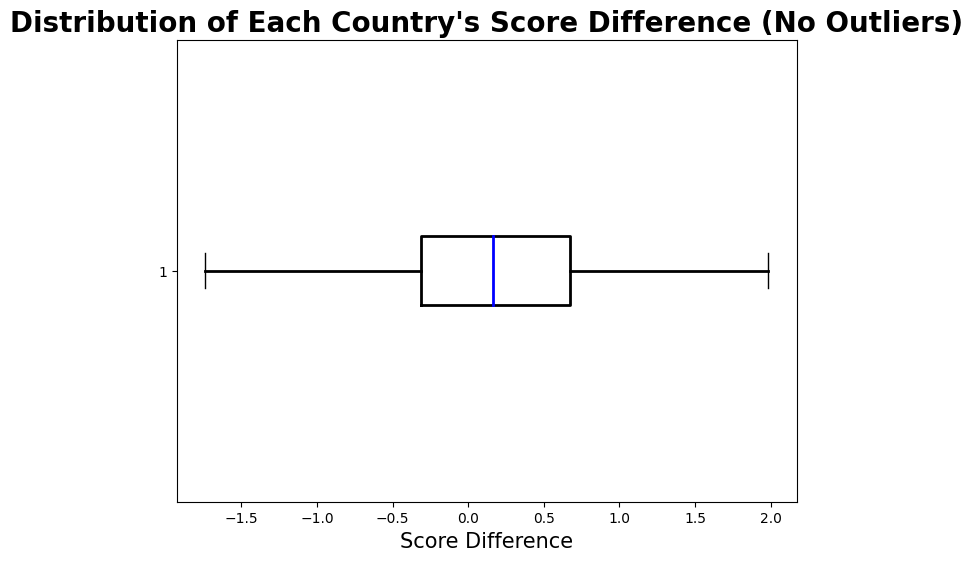

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(clean_df["ScoreDifference"], 
           vert = False,
           boxprops = dict(linewidth=2),
           whiskerprops=dict(linewidth=2),
           medianprops=dict(linewidth=2, color='blue'),
           flierprops=dict(marker='o', markersize=5, markeredgecolor='red'))

ax.set_title("Distribution of Each Country's Score Difference (No Outliers)", 
             fontname = "Times New Roman",
             fontsize = 20,
             fontweight = 'bold')
ax.set_xlabel("Score Difference", 
             fontname = "Times New Roman",
             fontsize = 15)

plt.show()

Since there are no longer any outliers and our sample size is greater than 30 (the sample mean is approximately normally distributed due to the  Central Limit Theorem), we can go ahead a perform our hypothesis test. 

### Now I can perform the hypothesis testusing the P-Value Approach.


#### P-Value Approach


**Step 1** Determine the null and alternative hypotheses. 

**Step 2** Select a level of significance, $\alpha$, depending on the seriousness of making a Type I error. 

**Step 3** Obtain the P-value.

**Step 4**  If P-value < $\alpha$, reject the null hypothesis.

**Step 5** State the conclusion.

##### Note: alpha = 0.05


In [ ]:
# Getting the sample mean
scorediff_mean= clean_df["ScoreDifference"].mean() 
scorediff_mean

0.1891593631

In [ ]:
# Getting the sample standard deviation
scorediff_stdev = clean_df["ScoreDifference"].std()  
scorediff_stdev

0.7202170791939687

In [ ]:
import scipy.stats as stats

tstat, p_val = stats.ttest_1samp(a = clean_df["ScoreDifference"],
                                 popmean = 0, # Pop mean
                                 alternative='less')   #left-tailed test

print(f"The p-value is {p_val}.")

The p-value is 0.99920459351876.


Since the **p-value** is **greater** than our **alpha value (0.05)**, we **fail to reject the null hypothesis**. This means that on average, the happiness scores have NOT decreased overtime. 

## Finding Confidence Interval 

Let's now find a 95% confidence interval in order to estimate how much a country's score changes overtime. 

In [ ]:
#sample size of clean_df

len(clean_df)

150

In [ ]:
import math

sample_size = 150
sample_mean = scorediff_mean # Get the sample mean (of Score diff col, found earlier)

t_critical = stats.t.ppf(q = 0.975, df = sample_size - 1)  # Get the t-critical value*

print("t-critical value:")              # Check the t-critical value
print(t_critical)                        

stdev = scorediff_stdev  # Get the sample standard deviation

margin_of_error = t_critical * (stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.976013177679155
Confidence interval:
(0.07295896312119939, 0.30535976307880064)


I am 95% confident that the average happiness score difference throughout the countries is between 0.073 and 0.305